In [11]:
import numpy as np
print(np.__version__)

2.0.0


In [1]:
import random
import time
import numpy as np


import warnings
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2024-06-19 18:35:56.227059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 18:35:58.680417: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
warnings.filterwarnings("ignore")

# Load

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 154s 6us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 143s 32us/step


# EDA

In [3]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

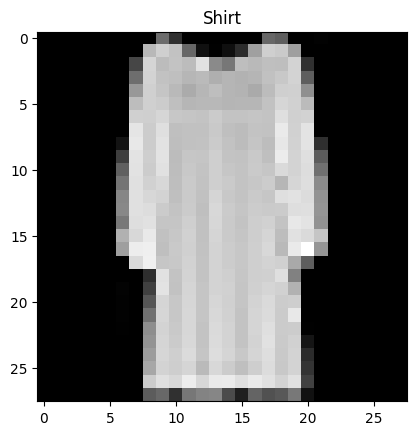

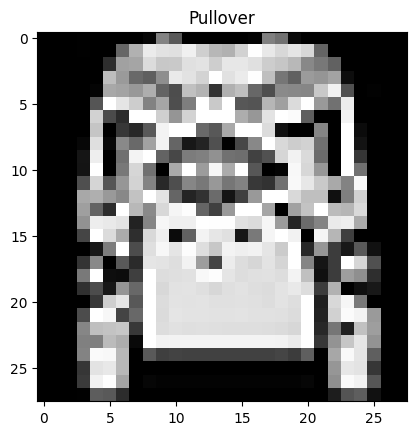

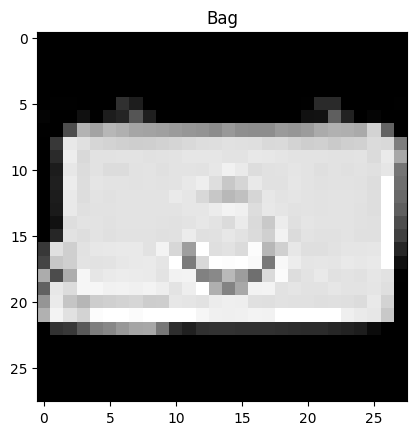

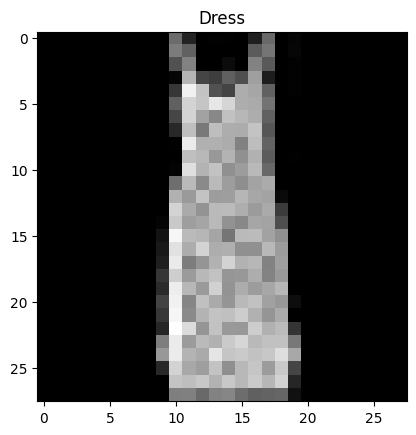

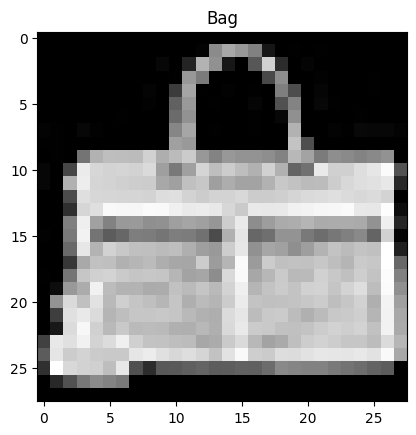

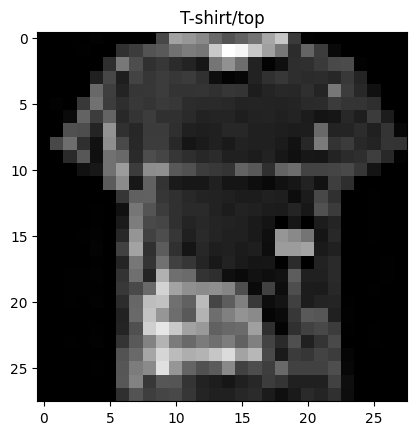

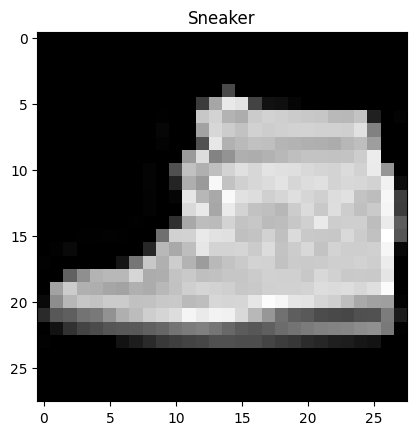

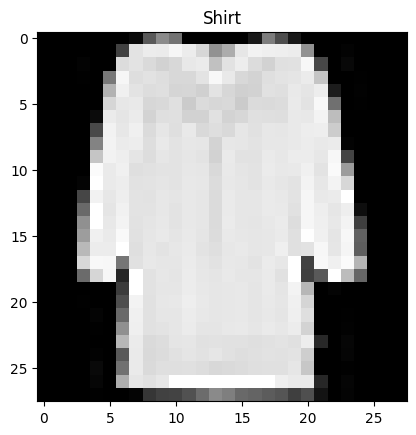

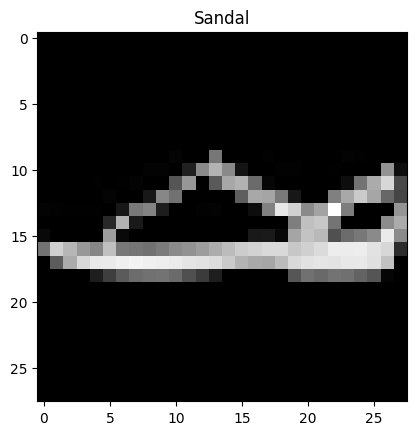

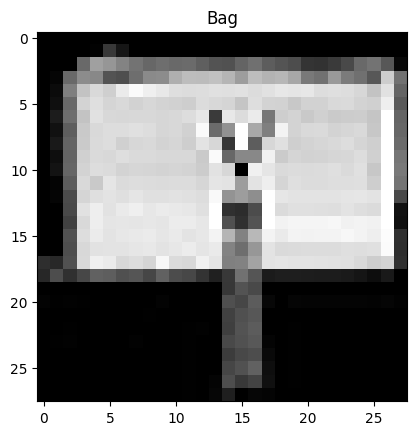

In [4]:
for i in range(10):
    idx = random.randint(0, train_images.shape[0] - 1)
    img = train_images[idx].reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.title(f"{class_names[train_labels[idx]]}")
    plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
import pandas as pd
pd.DataFrame(train_labels).value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

# Preprocessing

In [9]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3500 # максимальне число епох                                          було 3000
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

In [10]:
# Перетворюємо цілочисельні пікселі на тип float32
train_images, test_images = np.array(train_images, np.float32), np.array(test_images, np.float32)

# # Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
# train_images, test_images = train_images.reshape([-1, num_features]), test_images.reshape([-1, num_features])

# # Нормалізуємо значення пікселів
# train_images, test_images = train_images / 255., test_images / 255.

# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_images))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

2024-06-19 18:42:39.895954: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-19 18:42:39.898492: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-06-19 18:42:40.838093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


# Model

In [11]:
def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Change')
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='Train')
    ax2.plot(history.history['val_accuracy'], label='Validation')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy change')
    ax2.legend()
    
    plt.show()

### Optimizer choise

#### Model 1: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, no batc

In [12]:
name_model_1 = '1: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, no batch'

In [13]:
epochs = 10

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [14]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output')
])

In [15]:
model_1.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
              )

In [16]:
start_model_1 = time.time()

In [17]:
history_1 = model_1.fit(train_images, train_labels,
                        epochs=epochs,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6737 - loss: 1.0458 - val_accuracy: 0.8120 - val_loss: 0.5551
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.8159 - loss: 0.5418 - val_accuracy: 0.8178 - val_loss: 0.5050
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8338 - loss: 0.4858 - val_accuracy: 0.8360 - val_loss: 0.4611
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8415 - loss: 0.4552 - val_accuracy: 0.8413 - val_loss: 0.4470
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8457 - loss: 0.4405 - val_accuracy: 0.8310 - val_loss: 0.4659
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8542 - loss: 0.4239 - val_accuracy: 0.8518 - val_loss: 0.4151
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8561 - loss: 0.4127 - val_accuracy: 0.8463 - val_loss: 0.4290
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8619 -

In [18]:
end_model_1  = time.time() - start_model_1 

In [19]:
test_loss_model_1 , test_acc_model_1  = model_1.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_1 )
print('Test loss:', test_loss_model_1 )
print ('Learning time, sec:', f'{end_model_1:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8323 - loss: 0.4674
Test accuracy: 0.8277999758720398
Test loss: 0.46708574891090393
Learning time, sec: 266.92


In [20]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

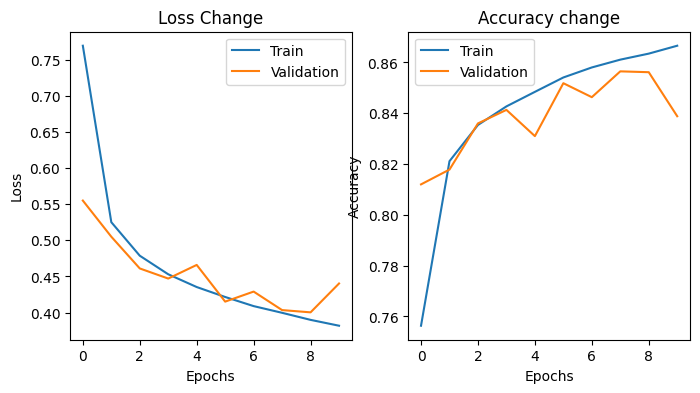

In [21]:
plot_curves(history_1)

#### Model 2: SGD - Hidden ReLU (128) + Output Softmax (10) - 30 epochs, no batch

In [22]:
name_model_2 = '2: SGD - Hidden ReLU (128) + Output Softmax (10) - 30 epochs, no batch'

In [23]:
epochs = 30

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [24]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output')
])

In [25]:
model_2.compile(optimizer=optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

In [26]:
start_model_2 = time.time()

In [27]:
history_2 = model_2.fit(train_images, train_labels,
                        epochs=epochs,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6666 - loss: 1.0713 - val_accuracy: 0.8130 - val_loss: 0.5550
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8221 - loss: 0.5375 - val_accuracy: 0.8245 - val_loss: 0.5002
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8356 - loss: 0.4823 - val_accuracy: 0.8372 - val_loss: 0.4552
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8444 - loss: 0.4545 - val_accuracy: 0.8377 - val_loss: 0.4452
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8493 - loss: 0.4372 - val_accuracy: 0.8462 - val_loss: 0.4308
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8533 - loss: 0.4265 - val_accuracy: 0.8508 - val_loss: 0.4140
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8559 - loss: 0.4136 - val_accuracy: 0.8533 - val_loss: 0.4045
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8637 - los

In [28]:
end_model_2  = time.time() - start_model_2 

In [29]:
test_loss_model_2 , test_acc_model_2  = model_2.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_2 )
print('Test loss:', test_loss_model_2 )
print ('Learning time, sec:', f'{end_model_2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8735 - loss: 0.3585
Test accuracy: 0.8697999715805054
Test loss: 0.3659115731716156
Learning time, sec: 601.21


In [30]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

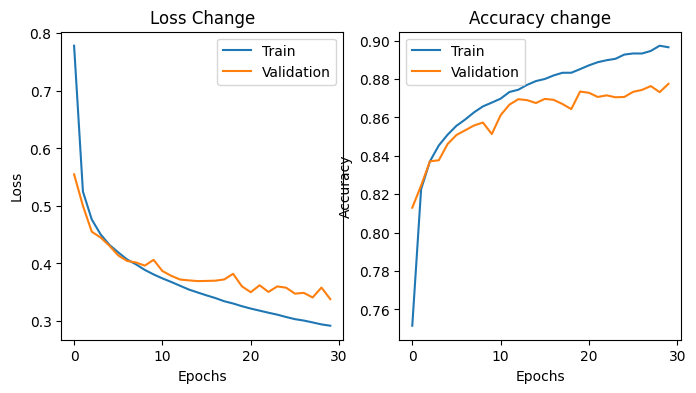

In [31]:
plot_curves(history_2)

#### Model 3: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, batch = 8

In [32]:
name_model_3 = '3: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, batch = 8'

In [33]:
epochs = 10
batch_size = 8

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [34]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [35]:
model_3.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
start_model_3 = time.time()

In [37]:
history_3 = model_3.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6091 - loss: 1.2061 - val_accuracy: 0.7760 - val_loss: 0.6717
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7831 - loss: 0.6372 - val_accuracy: 0.8180 - val_loss: 0.5744
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8013 - loss: 0.5680 - val_accuracy: 0.8090 - val_loss: 0.5707
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8132 - loss: 0.5196 - val_accuracy: 0.8350 - val_loss: 0.4790
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8301 - loss: 0.4961 - val_accuracy: 0.8150 - val_loss: 0.5251
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8403 - loss: 0.4684 - val_accuracy: 0.8450 - val_loss: 0.4619
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8332 - loss: 0.4676 - val_accuracy: 0.8310 - val_loss: 0.5111
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8393 - los

In [38]:
end_model_3  = time.time() - start_model_1 

In [39]:
test_loss_model_3 , test_acc_model_3  = model_3.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_3 )
print('Test loss:', test_loss_model_3 )
print ('Learning time, sec:', f'{end_model_3:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8615 - loss: 0.3986
Test accuracy: 0.8549000024795532
Test loss: 0.4164881706237793
Learning time, sec: 1025.61


In [40]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

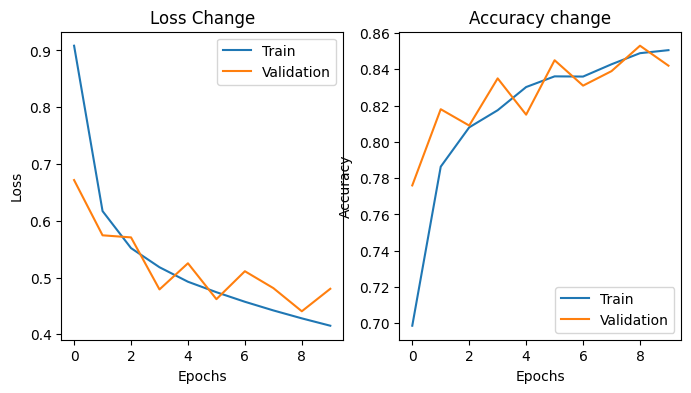

In [41]:
plot_curves(history_3)

#### Model 4: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4

In [42]:
name_model_4 = '4: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4'

In [43]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [44]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [45]:
model_4.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
start_model_4 = time.time()

In [47]:
history_4 = model_4.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6346 - loss: 1.0741 - val_accuracy: 0.8020 - val_loss: 0.6134
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.7866 - loss: 0.5859 - val_accuracy: 0.8050 - val_loss: 0.5516
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8170 - loss: 0.5206 - val_accuracy: 0.8200 - val_loss: 0.4953
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.8246 - loss: 0.4828 - val_accuracy: 0.8440 - val_loss: 0.4733
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.8374 - loss: 0.4404 - val_accuracy: 0.8400 - val_loss: 0.5082
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.8461 - loss: 0.4299 - val_accuracy: 0.8310 - val_loss: 0.4789
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8569 - loss: 0.3989 - val_accuracy: 0.8500 - val_loss: 0.4509
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8599 - loss: 

In [48]:
end_model_4  = time.time() - start_model_4 

In [49]:
test_loss_model_4 , test_acc_model_4  = model_4.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_4 )
print('Test loss:', test_loss_model_4 )
print ('Learning time, sec:', f'{end_model_4:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8826 - loss: 0.3367
Test accuracy: 0.8770999908447266
Test loss: 0.3480663299560547
Learning time, sec: 276.73


In [50]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

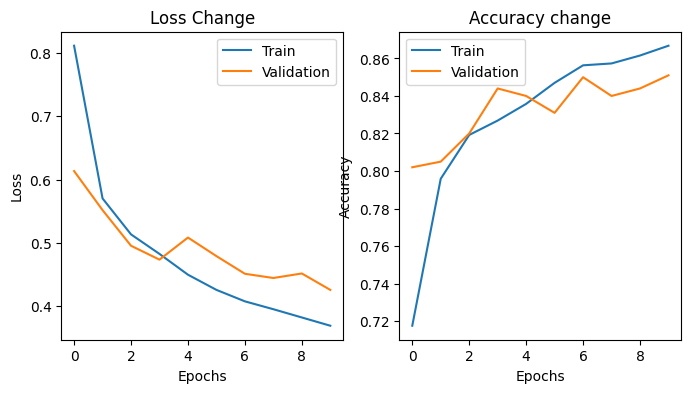

In [51]:
plot_curves(history_4)

#### Model 5: Adam - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4

In [52]:
name_model_5 = '5: Adam - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4'

In [53]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [54]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [55]:
model_5.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [56]:
start_model_5 = time.time()

In [57]:
history_5 = model_5.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.7037 - loss: 0.8496 - val_accuracy: 0.8180 - val_loss: 0.5285
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.8010 - loss: 0.5308 - val_accuracy: 0.8260 - val_loss: 0.4669
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.8395 - loss: 0.4529 - val_accuracy: 0.8170 - val_loss: 0.4971
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8531 - loss: 0.4139 - val_accuracy: 0.8070 - val_loss: 0.4779
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.8558 - loss: 0.3817 - val_accuracy: 0.8470 - val_loss: 0.4355
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8728 - loss: 0.3599 - val_accuracy: 0.8240 - val_loss: 0.4825
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8748 - loss: 0.3371 - val_accuracy: 0.8280 - val_loss: 0.4566
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8767 -

In [58]:
end_model_5  = time.time() - start_model_5 

In [59]:
test_loss_model_5 , test_acc_model_5  = model_5.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_5 )
print('Test loss:', test_loss_model_5 )
print ('Learning time, sec:', f'{end_model_5:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8989 - loss: 0.2614
Test accuracy: 0.8913000226020813
Test loss: 0.28485772013664246
Learning time, sec: 378.08


In [60]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

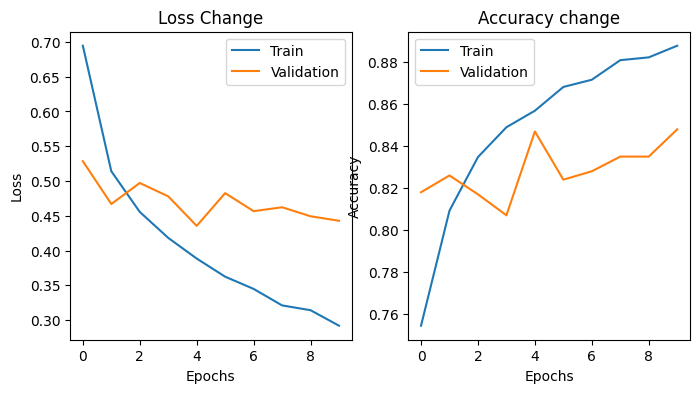

In [61]:
plot_curves(history_5)

#### Model 6: SGD Momentum - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4

In [62]:
name_model_6 = '6: SGD Momentum - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4'

In [63]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [64]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [65]:
model_6.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [66]:
start_model_6 = time.time()

In [67]:
history_6 = model_6.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.6401 - loss: 0.9989 - val_accuracy: 0.6870 - val_loss: 0.7286
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.7382 - loss: 0.7010 - val_accuracy: 0.7650 - val_loss: 0.6489
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.7888 - loss: 0.5912 - val_accuracy: 0.7760 - val_loss: 0.6249
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.7940 - loss: 0.5804 - val_accuracy: 0.7670 - val_loss: 0.6701
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8016 - loss: 0.5456 - val_accuracy: 0.7760 - val_loss: 0.6220
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7958 - loss: 0.5661 - val_accuracy: 0.7540 - val_loss: 0.6343
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8252 - loss: 0.4973 - val_accuracy: 0.7980 - val_loss: 0.6061
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.8193 - loss

In [68]:
end_model_6  = time.time() - start_model_6

In [69]:
test_loss_model_6 , test_acc_model_6  = model_6.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_6 )
print('Test loss:', test_loss_model_6 )
print ('Learning time, sec:', f'{end_model_6:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8508 - loss: 0.4075
Test accuracy: 0.8458999991416931
Test loss: 0.42795902490615845
Learning time, sec: 338.32


In [70]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

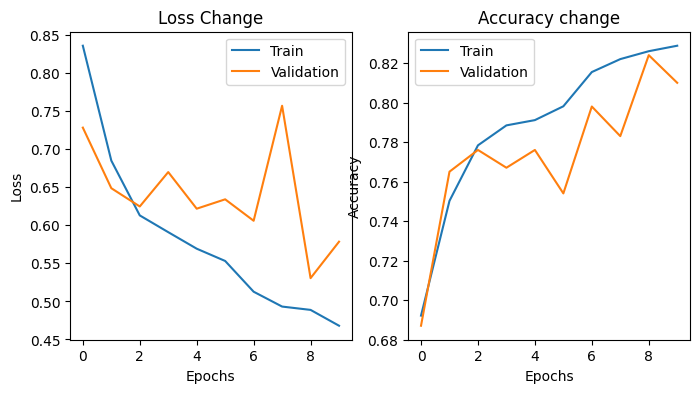

In [71]:
plot_curves(history_6)

#### Model 7: SGD Nesterov - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4

In [72]:
name_model_7 = '7: SGD Nesterov - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4'

In [73]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [74]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [75]:
model_7.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [76]:
start_model_7 = time.time()

In [77]:
history_7 = model_7.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.6620 - loss: 0.9401 - val_accuracy: 0.7750 - val_loss: 0.6129
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7625 - loss: 0.6492 - val_accuracy: 0.7700 - val_loss: 0.6607
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7900 - loss: 0.5918 - val_accuracy: 0.8010 - val_loss: 0.5580
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.7999 - loss: 0.5555 - val_accuracy: 0.8080 - val_loss: 0.5448
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8098 - loss: 0.5357 - val_accuracy: 0.8120 - val_loss: 0.6034
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8169 - loss: 0.5117 - val_accuracy: 0.7820 - val_loss: 0.5756
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8231 - loss: 0.4832 - val_accuracy: 0.8150 - val_loss: 0.5684
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8413 -

In [78]:
end_model_7  = time.time() - start_model_7 

In [79]:
test_loss_model_7 , test_acc_model_7  = model_7.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_7 )
print('Test loss:', test_loss_model_7 )
print ('Learning time, sec:', f'{end_model_7:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8413 - loss: 0.4330
Test accuracy: 0.8371000289916992
Test loss: 0.45100221037864685
Learning time, sec: 385.52


In [80]:
model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

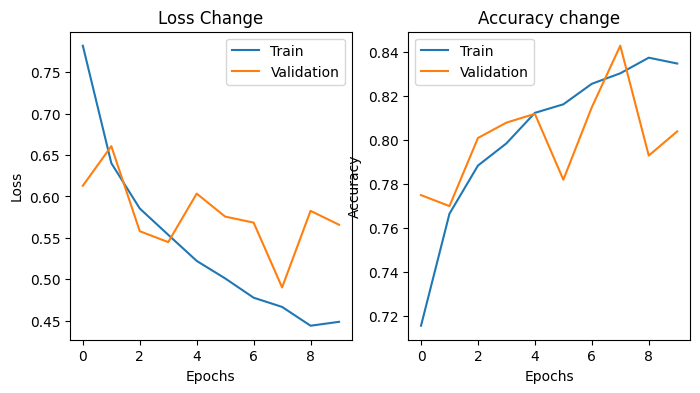

In [81]:
plot_curves(history_7)

#### Model 8: RMSProp - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4

In [82]:
name_model_8 = '8: RMSProp - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4'

In [83]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.95)

In [84]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [85]:
model_8.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [86]:
start_model_8 = time.time()

In [87]:
history_8 = model_8.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.6315 - loss: 1.4809 - val_accuracy: 0.7190 - val_loss: 0.9696
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.7429 - loss: 0.8408 - val_accuracy: 0.7470 - val_loss: 0.7971
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7514 - loss: 0.7973 - val_accuracy: 0.7570 - val_loss: 0.7658
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 65s 21ms/step - accuracy: 0.7510 - loss: 0.8165 - val_accuracy: 0.7350 - val_loss: 1.4070
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.7632 - loss: 0.8373 - val_accuracy: 0.7550 - val_loss: 0.9592
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7535 - loss: 0.8152 - val_accuracy: 0.7600 - val_loss: 0.8839
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7716 - loss: 0.7957 - val_accuracy: 0.7540 - val_loss: 0.9678
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.7776 - 

In [88]:
end_model_8  = time.time() - start_model_8 

In [89]:
test_loss_model_8 , test_acc_model_8  = model_8.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_8 )
print('Test loss:', test_loss_model_8 )
print ('Learning time, sec:', f'{end_model_8:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7745 - loss: 0.9994
Test accuracy: 0.7684000134468079
Test loss: 1.1373604536056519
Learning time, sec: 390.47


In [90]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,542 (795.09 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,772 (397.55 KB)

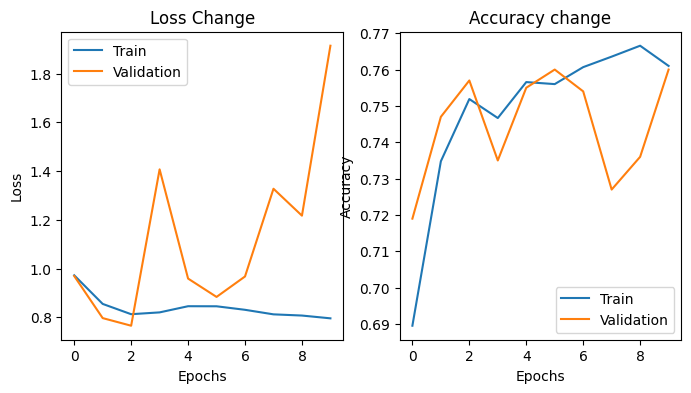

In [91]:
plot_curves(history_8)

### Adam settings

#### Model 9: Adam - Hidden ReLU (128) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [92]:
name_model_9 = '9: Adam - Hidden ReLU (128) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [93]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [94]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [95]:
model_9.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [96]:
start_model_9 = time.time()

In [97]:
history_9 = model_9.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.6886 - loss: 0.8837 - val_accuracy: 0.7700 - val_loss: 0.5991
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8127 - loss: 0.5120 - val_accuracy: 0.8350 - val_loss: 0.5035
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8196 - loss: 0.4872 - val_accuracy: 0.8350 - val_loss: 0.4769
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8395 - loss: 0.4330 - val_accuracy: 0.8340 - val_loss: 0.4775
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8502 - loss: 0.4016 - val_accuracy: 0.8450 - val_loss: 0.4472
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8565 - loss: 0.3762 - val_accuracy: 0.8190 - val_loss: 0.5684
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8630 - loss: 0.3686 - val_accuracy: 0.8340 - val_loss: 0.4722
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8743 -

In [98]:
end_model_9  = time.time() - start_model_9

In [99]:
test_loss_model_9 , test_acc_model_9  = model_9.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_9 )
print('Test loss:', test_loss_model_9 )
print ('Learning time, sec:', f'{end_model_9:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8914 - loss: 0.2910
Test accuracy: 0.8834999799728394
Test loss: 0.31639423966407776
Learning time, sec: 393.06


In [100]:
model_9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

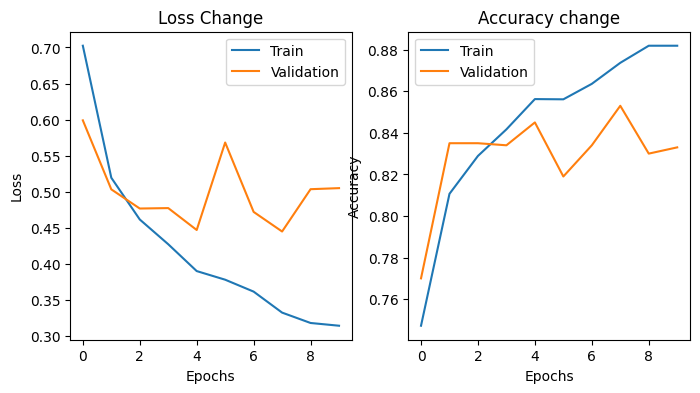

In [101]:
plot_curves(history_9)

#### Model 10: Adam - Hidden ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [102]:
name_model_10 ='10: Adam - Hidden ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [103]:
epochs = 10
batch_size = 4

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

In [104]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [105]:
model_10.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [106]:
start_model_10 = time.time()

In [107]:
history_10 = model_10.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6502 - loss: 0.9714 - val_accuracy: 0.8060 - val_loss: 0.5561
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.7874 - loss: 0.5696 - val_accuracy: 0.7810 - val_loss: 0.6090
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8080 - loss: 0.5247 - val_accuracy: 0.8270 - val_loss: 0.5067
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8166 - loss: 0.4942 - val_accuracy: 0.8040 - val_loss: 0.5535
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.8300 - loss: 0.4575 - val_accuracy: 0.8390 - val_loss: 0.4585
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.8359 - loss: 0.4449 - val_accuracy: 0.8300 - val_loss: 0.4808
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8380 - loss: 0.4305 - val_accuracy: 0.8200 - val_loss: 0.4690
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8480 -

In [108]:
end_model_10  = time.time() - start_model_10 

In [109]:
test_loss_model_10 , test_acc_model_10  = model_10.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_10 )
print('Test loss:', test_loss_model_10 )
print ('Learning time, sec:', f'{end_model_10:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8746 - loss: 0.3393
Test accuracy: 0.8716999888420105
Test loss: 0.3521106243133545
Learning time, sec: 372.91


In [110]:
model_10.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

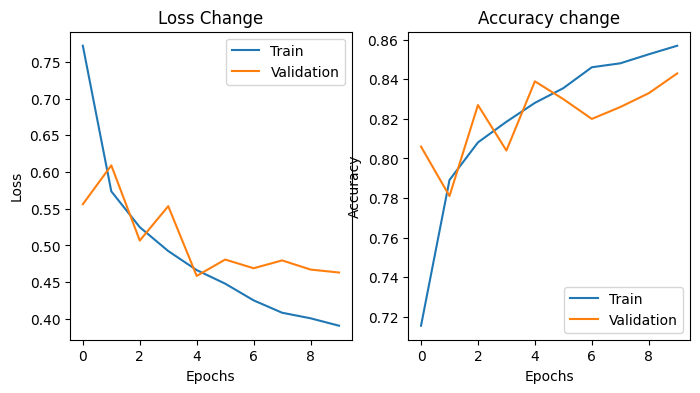

In [111]:
plot_curves(history_10)

#### Model 11: Adam - Hidden ReLU (128, L1) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [112]:
name_model_11 ='11: Adam - Hidden ReLU (128, L1) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [113]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [114]:
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [115]:
model_11.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [116]:
start_model_11 = time.time()

In [117]:
history_11 = model_11.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5152 - loss: 5.9591 - val_accuracy: 0.6670 - val_loss: 1.6783
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6347 - loss: 1.7365 - val_accuracy: 0.6530 - val_loss: 1.5549
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.6447 - loss: 1.6943 - val_accuracy: 0.6920 - val_loss: 1.5412
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.6519 - loss: 1.6705 - val_accuracy: 0.6750 - val_loss: 1.5694
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.6671 - loss: 1.6119 - val_accuracy: 0.6750 - val_loss: 1.5587
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.6456 - loss: 1.6447 - val_accuracy: 0.7140 - val_loss: 1.5869
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6546 - loss: 1.6309 - val_accuracy: 0.7470 - val_loss: 1.4056
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.6550 -

In [118]:
end_model_11  = time.time() - start_model_11 

In [119]:
test_loss_model_11 , test_acc_model_11  = model_11.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_11 )
print('Test loss:', test_loss_model_11 )
print ('Learning time, sec:', f'{end_model_11:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7279 - loss: 1.4274
Test accuracy: 0.7261999845504761
Test loss: 1.425559639930725
Learning time, sec: 387.49


In [120]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

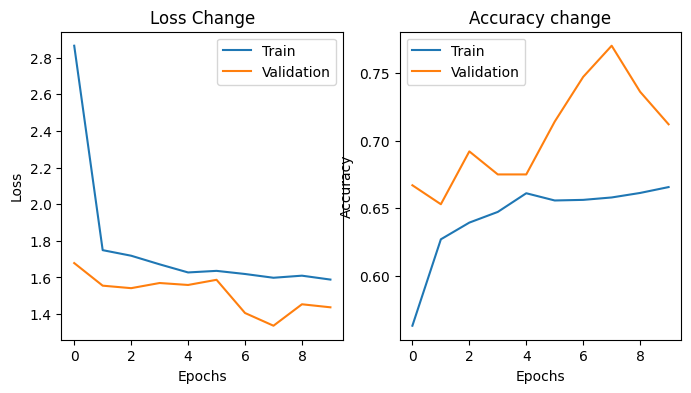

In [121]:
plot_curves(history_11)

#### Model 12: Adam - Hidden ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [122]:
name_model_12 ='12: Adam - Hidden ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [123]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [124]:
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [125]:
model_12.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [126]:
start_model_12 = time.time()

In [127]:
history_12 = model_12.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6185 - loss: 1.7453 - val_accuracy: 0.7720 - val_loss: 0.8589
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.7273 - loss: 0.9322 - val_accuracy: 0.7610 - val_loss: 0.7789
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7207 - loss: 0.8928 - val_accuracy: 0.7750 - val_loss: 0.7940
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.7547 - loss: 0.8481 - val_accuracy: 0.7480 - val_loss: 0.8231
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.7316 - loss: 0.8696 - val_accuracy: 0.7780 - val_loss: 0.8017
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7504 - loss: 0.8366 - val_accuracy: 0.7990 - val_loss: 0.7686
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7540 - loss: 0.8426 - val_accuracy: 0.8100 - val_loss: 0.7125
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7439 -

In [128]:
end_model_12  = time.time() - start_model_12 

In [129]:
test_loss_model_12 , test_acc_model_12  = model_12.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_12 )
print('Test loss:', test_loss_model_12 )
print ('Learning time, sec:', f'{end_model_12:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8029 - loss: 0.7365
Test accuracy: 0.796999990940094
Test loss: 0.7478521466255188
Learning time, sec: 406.17


In [130]:
model_12.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

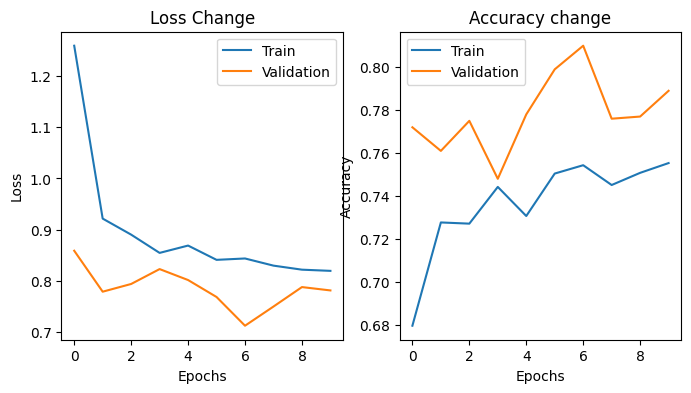

In [131]:
plot_curves(history_12)

#### Model 13: Adam - Hidden ReLU (128, L1+L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [132]:
name_model_13 ='13: Adam - Hidden ReLU (128, L1+L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [133]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [134]:
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [135]:
model_13.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [136]:
start_model_13 = time.time()

In [137]:
history_13 = model_13.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5030 - loss: 5.9549 - val_accuracy: 0.7080 - val_loss: 1.6999
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.6047 - loss: 1.8409 - val_accuracy: 0.6710 - val_loss: 1.6213
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6224 - loss: 1.7657 - val_accuracy: 0.7210 - val_loss: 1.6128
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.6379 - loss: 1.7008 - val_accuracy: 0.7270 - val_loss: 1.4964
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6294 - loss: 1.6950 - val_accuracy: 0.7230 - val_loss: 1.4298
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6420 - loss: 1.6600 - val_accuracy: 0.7190 - val_loss: 1.5397
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.6434 - loss: 1.6649 - val_accuracy: 0.7270 - val_loss: 1.4891
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6405 -

In [138]:
end_model_13  = time.time() - start_model_13 

In [139]:
test_loss_model_13 , test_acc_model_13  = model_13.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_13 )
print('Test loss:', test_loss_model_13 )
print ('Learning time, sec:', f'{end_model_13:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7179 - loss: 1.4957
Test accuracy: 0.715499997138977
Test loss: 1.5025213956832886
Learning time, sec: 410.93


In [140]:
model_13.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

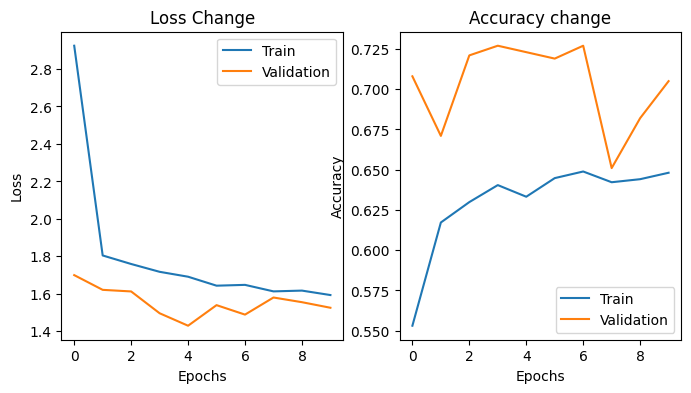

In [141]:
plot_curves(history_13)

#### Model 14: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [142]:
name_model_14 ='14: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [143]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [144]:
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [145]:
model_14.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [146]:
start_model_14 = time.time()

In [147]:
history_14 = model_14.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6389 - loss: 1.0265 - val_accuracy: 0.8100 - val_loss: 0.5203
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.7907 - loss: 0.5615 - val_accuracy: 0.8170 - val_loss: 0.4830
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8092 - loss: 0.5049 - val_accuracy: 0.8230 - val_loss: 0.5136
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.8257 - loss: 0.4625 - val_accuracy: 0.8220 - val_loss: 0.4886
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8444 - loss: 0.4198 - val_accuracy: 0.8390 - val_loss: 0.4623
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8528 - loss: 0.3881 - val_accuracy: 0.8130 - val_loss: 0.4762
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8646 - loss: 0.3797 - val_accuracy: 0.8360 - val_loss: 0.4784
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8542 -

In [148]:
end_model_14  = time.time() - start_model_14

In [149]:
test_loss_model_14 , test_acc_model_14  = model_14.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_14 )
print('Test loss:', test_loss_model_14 )
print ('Learning time, sec:', f'{end_model_14:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8931 - loss: 0.2934
Test accuracy: 0.8841000199317932
Test loss: 0.3140386939048767
Learning time, sec: 410.32


In [150]:
model_14.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

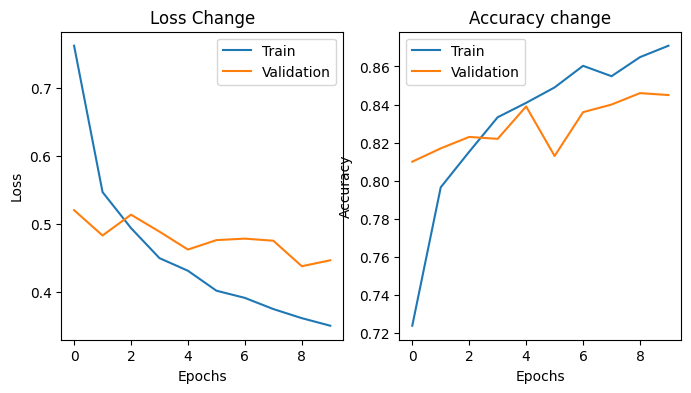

In [151]:
plot_curves(history_14)

#### Model 15: Adam - Hidden Tanh  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [152]:
name_model_15 ='15: Adam - Hidden Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [153]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [154]:
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='tanh', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [155]:
model_15.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [156]:
start_model_15 = time.time()

In [157]:
history_15 = model_15.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.6633 - loss: 0.8994 - val_accuracy: 0.8120 - val_loss: 0.5554
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.7911 - loss: 0.5533 - val_accuracy: 0.7940 - val_loss: 0.5260
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8175 - loss: 0.4946 - val_accuracy: 0.8160 - val_loss: 0.5063
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8147 - loss: 0.4960 - val_accuracy: 0.8240 - val_loss: 0.4711
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8339 - loss: 0.4539 - val_accuracy: 0.8330 - val_loss: 0.4547
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.8271 - loss: 0.4553 - val_accuracy: 0.8240 - val_loss: 0.4818
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8480 - loss: 0.4166 - val_accuracy: 0.8390 - val_loss: 0.4767
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8384 -

In [158]:
end_model_15  = time.time() - start_model_15

In [159]:
test_loss_model_15 , test_acc_model_15  = model_15.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_15 )
print('Test loss:', test_loss_model_15 )
print ('Learning time, sec:', f'{end_model_15:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8674 - loss: 0.3558
Test accuracy: 0.8636999726295471
Test loss: 0.37502190470695496
Learning time, sec: 399.50


In [160]:
model_15.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

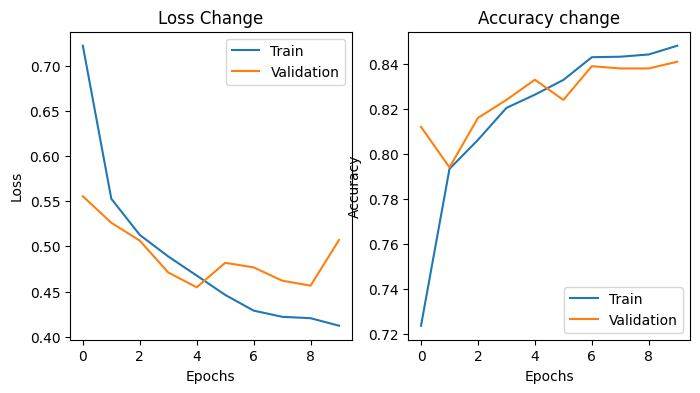

In [161]:
plot_curves(history_15)

#### Model 16: Adam - Hidden Leaky_relu  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [162]:
name_model_16 ='16: Adam - Hidden Leaky_relu (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [163]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [164]:
model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='leaky_relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [165]:
model_16.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [166]:
start_model_16 = time.time()

In [167]:
history_16 = model_16.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6670 - loss: 0.9410 - val_accuracy: 0.7920 - val_loss: 0.5503
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 66s 25ms/step - accuracy: 0.7843 - loss: 0.5853 - val_accuracy: 0.8140 - val_loss: 0.5094
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.8203 - loss: 0.5050 - val_accuracy: 0.8050 - val_loss: 0.4988
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.8236 - loss: 0.4727 - val_accuracy: 0.8090 - val_loss: 0.5237
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8271 - loss: 0.4642 - val_accuracy: 0.8300 - val_loss: 0.4990
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.8437 - loss: 0.4330 - val_accuracy: 0.8270 - val_loss: 0.4952
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8487 - loss: 0.4181 - val_accuracy: 0.8440 - val_loss: 0.4677
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.8459 -

In [168]:
end_model_16  = time.time() - start_model_16

In [169]:
test_loss_model_16 , test_acc_model_16  = model_16.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_16 )
print('Test loss:', test_loss_model_16 )
print ('Learning time, sec:', f'{end_model_16:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8842 - loss: 0.3161
Test accuracy: 0.8761000037193298
Test loss: 0.34016546607017517
Learning time, sec: 448.57


In [170]:
model_16.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

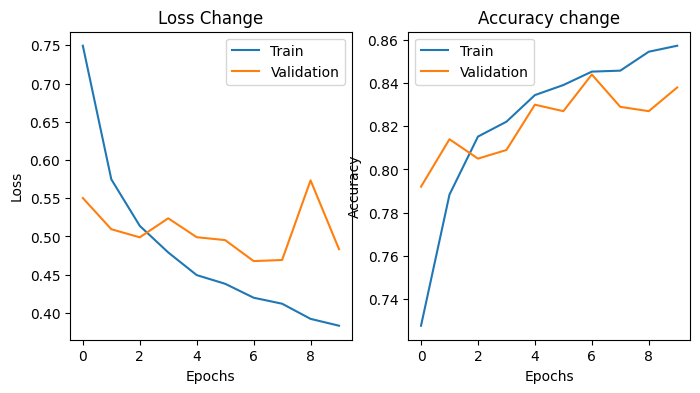

In [171]:
plot_curves(history_16)

#### Model 17: Adam - Hidden ReLU  (128) + Drop (0.2) + Sigmoid (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [172]:
name_model_17 ='17: Adam - Hidden Relu (128) + Drop (0.2) + Sigmoid (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [173]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [174]:
model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='sigmoid', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [175]:
model_17.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [176]:
start_model_17 = time.time()

In [177]:
history_17 = model_17.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.6480 - loss: 1.0487 - val_accuracy: 0.8090 - val_loss: 0.5696
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.7948 - loss: 0.5565 - val_accuracy: 0.8130 - val_loss: 0.5435
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.8140 - loss: 0.4916 - val_accuracy: 0.8380 - val_loss: 0.4777
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8348 - loss: 0.4491 - val_accuracy: 0.8250 - val_loss: 0.5049
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8480 - loss: 0.4143 - val_accuracy: 0.8370 - val_loss: 0.4521
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8497 - loss: 0.4059 - val_accuracy: 0.8280 - val_loss: 0.4776
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8571 - loss: 0.3797 - val_accuracy: 0.8360 - val_loss: 0.4375
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.8591 -

In [178]:
end_model_17  = time.time() - start_model_17

In [179]:
test_loss_model_17 , test_acc_model_17  = model_17.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_17 )
print('Test loss:', test_loss_model_17 )
print ('Learning time, sec:', f'{end_model_17:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8920 - loss: 0.3007
Test accuracy: 0.8862000107765198
Test loss: 0.3212146461009979
Learning time, sec: 418.04


In [180]:
model_17.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

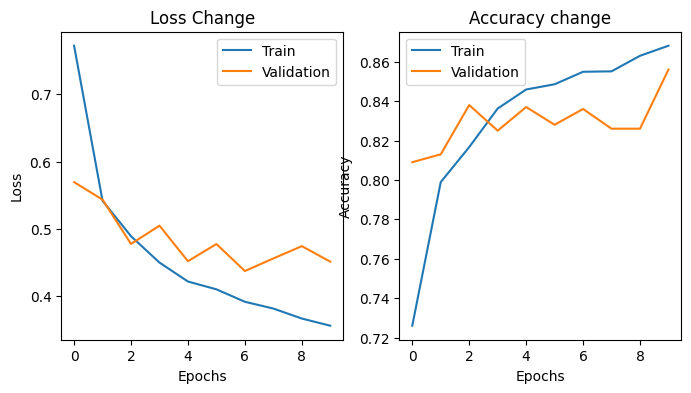

In [181]:
plot_curves(history_17)

#### Model 18: Adam - Hidden ReLU  (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [182]:
name_model_18 ='18: Adam - Hidden ReLU (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [183]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [184]:
model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [185]:
model_18.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [186]:
start_model_18 = time.time()

In [187]:
history_18 = model_18.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.6531 - loss: 0.9719 - val_accuracy: 0.8010 - val_loss: 0.5579
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.7844 - loss: 0.5963 - val_accuracy: 0.7980 - val_loss: 0.5594
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7943 - loss: 0.5587 - val_accuracy: 0.8190 - val_loss: 0.5197
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.8245 - loss: 0.4927 - val_accuracy: 0.8150 - val_loss: 0.4974
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 71s 14ms/step - accuracy: 0.8298 - loss: 0.4735 - val_accuracy: 0.8260 - val_loss: 0.5027
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.8307 - loss: 0.4575 - val_accuracy: 0.8430 - val_loss: 0.4520
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8430 - loss: 0.4256 - val_accuracy: 0.8430 - val_loss: 0.4722
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.8517 -

In [188]:
end_model_18  = time.time() - start_model_18

In [189]:
test_loss_model_18 , test_acc_model_18  = model_18.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_18 )
print('Test loss:', test_loss_model_18 )
print ('Learning time, sec:', f'{end_model_18:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8841 - loss: 0.3082
Test accuracy: 0.8794999718666077
Test loss: 0.3271004557609558
Learning time, sec: 457.67


In [190]:
model_18.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

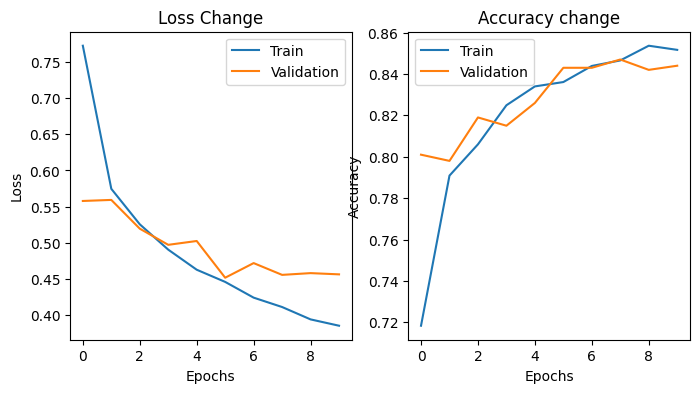

In [191]:
plot_curves(history_18)

#### Model 19: Adam - Hidden Silu  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [192]:
name_model_19 ='19: Adam - Hidden Silu (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [193]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [194]:
model_19 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='silu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [195]:
model_19.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [196]:
start_model_19 = time.time()

In [197]:
history_19 = model_19.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.6546 - loss: 0.9490 - val_accuracy: 0.7960 - val_loss: 0.5406
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.7953 - loss: 0.5444 - val_accuracy: 0.7640 - val_loss: 0.6032
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.8064 - loss: 0.5115 - val_accuracy: 0.8110 - val_loss: 0.4934
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.8298 - loss: 0.4570 - val_accuracy: 0.8050 - val_loss: 0.5511
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8391 - loss: 0.4215 - val_accuracy: 0.8180 - val_loss: 0.5043
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8505 - loss: 0.4044 - val_accuracy: 0.8520 - val_loss: 0.4314
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8538 - loss: 0.4008 - val_accuracy: 0.8380 - val_loss: 0.4313
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8587 -

In [198]:
end_model_19  = time.time() - start_model_19

In [199]:
test_loss_model_19 , test_acc_model_19  = model_19.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_19 )
print('Test loss:', test_loss_model_19 )
print ('Learning time, sec:', f'{end_model_19:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8952 - loss: 0.2767
Test accuracy: 0.88919997215271
Test loss: 0.29230138659477234
Learning time, sec: 391.75


In [200]:
model_19.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

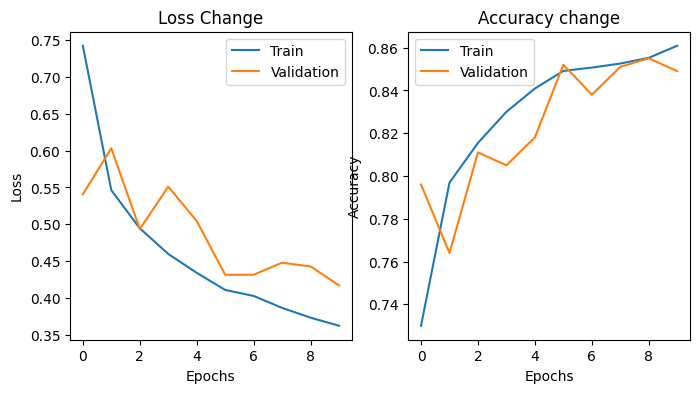

In [201]:
plot_curves(history_19)

#### Model 20: Adam - Hidden Sgmoid (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [202]:
name_model_20 ='20: Adam - Hidden Sigmoid (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [203]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [204]:
model_20 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [205]:
model_20.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [206]:
start_model_20 = time.time()

In [207]:
history_20 = model_20.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.6358 - loss: 0.9996 - val_accuracy: 0.8180 - val_loss: 0.5311
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.7961 - loss: 0.5549 - val_accuracy: 0.8090 - val_loss: 0.5220
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8092 - loss: 0.5119 - val_accuracy: 0.8330 - val_loss: 0.4804
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.8240 - loss: 0.4743 - val_accuracy: 0.8110 - val_loss: 0.5194
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8424 - loss: 0.4205 - val_accuracy: 0.8370 - val_loss: 0.4660
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8461 - loss: 0.4101 - val_accuracy: 0.8390 - val_loss: 0.4639
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8525 - loss: 0.3913 - val_accuracy: 0.8500 - val_loss: 0.4341
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.8663 -

In [208]:
end_model_20  = time.time() - start_model_20

In [209]:
test_loss_model_20 , test_acc_model_20  = model_20.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_20 )
print('Test loss:', test_loss_model_20 )
print ('Learning time, sec:', f'{end_model_20:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8905 - loss: 0.2962
Test accuracy: 0.8866000175476074
Test loss: 0.3149397075176239
Learning time, sec: 443.00


In [210]:
model_20.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

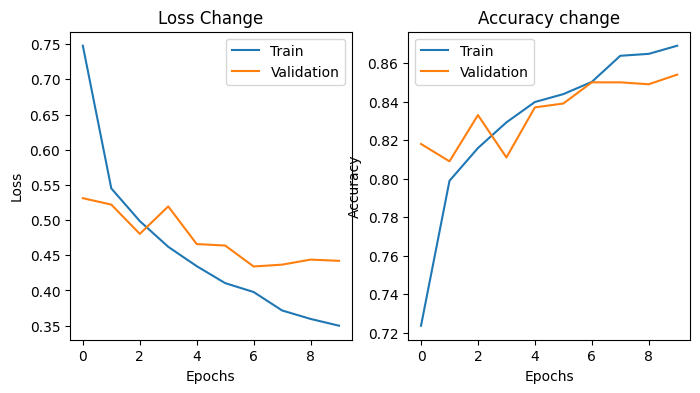

In [211]:
plot_curves(history_20)

#### Model 21: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Drop (0.2) + Output Softmax (10) - 10 epochs,  batch = 4

In [212]:
name_model_21 ='21: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Drop (0.2) + Output Softmax (10) - 10 epochs,  batch = 4'

In [213]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [214]:
model_21 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [215]:
model_21.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [216]:
start_model_21 = time.time()

In [217]:
history_21 = model_21.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.5942 - loss: 1.1117 - val_accuracy: 0.8000 - val_loss: 0.5474
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.7800 - loss: 0.5859 - val_accuracy: 0.8180 - val_loss: 0.5138
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.8140 - loss: 0.5152 - val_accuracy: 0.8410 - val_loss: 0.4624
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.8161 - loss: 0.4997 - val_accuracy: 0.8320 - val_loss: 0.4868
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8290 - loss: 0.4596 - val_accuracy: 0.8300 - val_loss: 0.4540
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.8445 - loss: 0.4351 - val_accuracy: 0.8450 - val_loss: 0.4368
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8547 - loss: 0.4003 - val_accuracy: 0.8450 - val_loss: 0.4624
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8460 -

In [218]:
end_model_21  = time.time() - start_model_21

In [219]:
test_loss_model_21 , test_acc_model_21  = model_21.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_21 )
print('Test loss:', test_loss_model_21 )
print ('Learning time, sec:', f'{end_model_21:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8825 - loss: 0.3085
Test accuracy: 0.8729000091552734
Test loss: 0.3332793116569519
Learning time, sec: 411.30


In [220]:
model_21.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop2 (Dropout)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

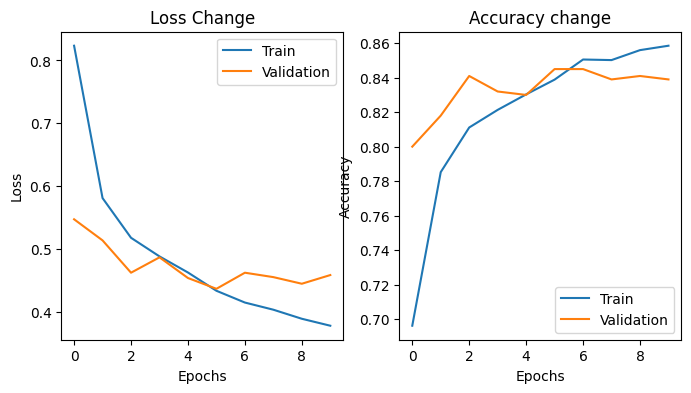

In [221]:
plot_curves(history_21)

#### Model 22: Adam - Hidden Sigmoid  (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [222]:
name_model_22 ='22: Adam - Hidden Sigm (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [223]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [224]:
model_22 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [225]:
model_22.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [226]:
start_model_22 = time.time()

In [227]:
history_22 = model_22.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5766 - loss: 1.7200 - val_accuracy: 0.7240 - val_loss: 0.9527
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.6891 - loss: 1.0418 - val_accuracy: 0.7560 - val_loss: 0.9355
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6959 - loss: 1.0113 - val_accuracy: 0.7150 - val_loss: 0.9421
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.6971 - loss: 1.0071 - val_accuracy: 0.6950 - val_loss: 0.9774
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6941 - loss: 1.0114 - val_accuracy: 0.7030 - val_loss: 1.0469
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7125 - loss: 0.9860 - val_accuracy: 0.7380 - val_loss: 0.8949
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7154 - loss: 0.9741 - val_accuracy: 0.7330 - val_loss: 0.9465
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7201 -

In [228]:
end_model_22  = time.time() - start_model_22

In [229]:
test_loss_model_22 , test_acc_model_22  = model_22.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_22 )
print('Test loss:', test_loss_model_22 )
print ('Learning time, sec:', f'{end_model_22:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7711 - loss: 0.8497
Test accuracy: 0.7702999711036682
Test loss: 0.8491098880767822
Learning time, sec: 404.09


In [230]:
model_22.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

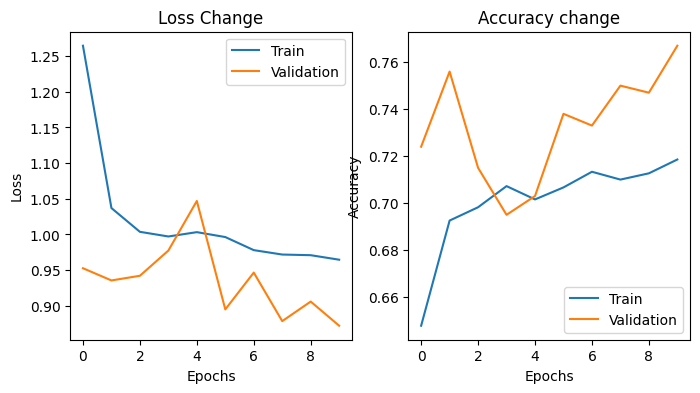

In [231]:
plot_curves(history_22)

#### Model 23: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 4

In [232]:
name_model_23 ='23: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 4'

In [233]:
epochs = 15
batch_size = 4


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [234]:
model_23 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [235]:
model_23.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [236]:
start_model_23 = time.time()

In [237]:
history_23 = model_23.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.6363 - loss: 1.0081 - val_accuracy: 0.7920 - val_loss: 0.5904
Epoch 2/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7910 - loss: 0.5655 - val_accuracy: 0.8190 - val_loss: 0.5057
Epoch 3/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8212 - loss: 0.4814 - val_accuracy: 0.8380 - val_loss: 0.4667
Epoch 4/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8226 - loss: 0.4736 - val_accuracy: 0.8320 - val_loss: 0.4724
Epoch 5/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8407 - loss: 0.4353 - val_accuracy: 0.8410 - val_loss: 0.4502
Epoch 6/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.8506 - loss: 0.3974 - val_accuracy: 0.8540 - val_loss: 0.4350
Epoch 7/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8554 - loss: 0.3836 - val_accuracy: 0.8460 - val_loss: 0.4432
Epoch 8/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8601 -

In [238]:
end_model_23  = time.time() - start_model_23

In [239]:
test_loss_model_23 , test_acc_model_23  = model_23.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_23 )
print('Test loss:', test_loss_model_23 )
print ('Learning time, sec:', f'{end_model_23:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9065 - loss: 0.2384
Test accuracy: 0.8981000185012817
Test loss: 0.26125985383987427
Learning time, sec: 569.78


In [240]:
model_23.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

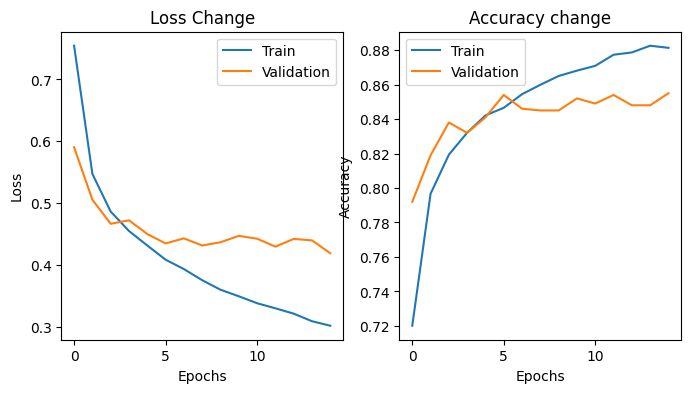

In [241]:
plot_curves(history_23)

#### Model 24: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 2

In [242]:
name_model_24 ='24: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 2'

In [243]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [244]:
model_24 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [245]:
model_24.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [246]:
start_model_24 = time.time()

In [247]:
history_24 = model_24.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.6411 - loss: 0.9672 - val_accuracy: 0.8120 - val_loss: 0.5207
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 58s 13ms/step - accuracy: 0.7927 - loss: 0.5637 - val_accuracy: 0.8230 - val_loss: 0.5308
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 84s 13ms/step - accuracy: 0.8089 - loss: 0.5072 - val_accuracy: 0.8330 - val_loss: 0.4743
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 88s 14ms/step - accuracy: 0.8269 - loss: 0.4702 - val_accuracy: 0.8400 - val_loss: 0.4696
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 58s 13ms/step - accuracy: 0.8404 - loss: 0.4391 - val_accuracy: 0.8370 - val_loss: 0.4800
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 59s 13ms/step - accuracy: 0.8505 - loss: 0.4174 - val_accuracy: 0.8170 - val_loss: 0.4858
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 95s 16ms/step - accuracy: 0.8482 - loss: 0.4083 - val_accuracy: 0.8330 - val_loss: 0.4919
Epoch 8/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 61s 14ms/step - accuracy: 0.8616 -

In [248]:
end_model_24  = time.time() - start_model_24

In [249]:
test_loss_model_24 , test_acc_model_24  = model_24.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_24 )
print('Test loss:', test_loss_model_24 )
print ('Learning time, sec:', f'{end_model_24:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8954 - loss: 0.2685
Test accuracy: 0.8889999985694885
Test loss: 0.29068174958229065
Learning time, sec: 1153.30


In [250]:
model_24.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

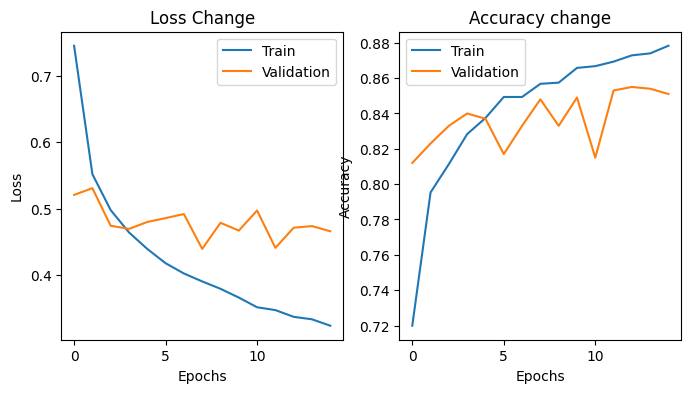

In [251]:
plot_curves(history_24)

#### Model 25: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [252]:
name_model_25 ='25: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [253]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [254]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [255]:
model_25 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [256]:
model_25.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [257]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [258]:
start_model_25 = time.time()

In [259]:
history_25 = model_25.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 74s 14ms/step - accuracy: 0.6531 - loss: 0.9619 - val_accuracy: 0.7830 - val_loss: 0.6047 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.7999 - loss: 0.5461 - val_accuracy: 0.8030 - val_loss: 0.5494 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.8195 - loss: 0.4876 - val_accuracy: 0.8260 - val_loss: 0.4802 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.8312 - loss: 0.4512 - val_accuracy: 0.8430 - val_loss: 0.4518 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.8440 - loss: 0.4276 - val_accuracy: 0.8430 - val_loss: 0.4410 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.8577 - loss: 0.3801 - val_accuracy: 0.8530 - val_loss: 0.4334 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 58s 13ms/step - ac

In [260]:
end_model_25  = time.time() - start_model_25

In [261]:
test_loss_model_25 , test_acc_model_25  = model_25.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_25 )
print('Test loss:', test_loss_model_25 )
print ('Learning time, sec:', f'{end_model_25:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9192 - loss: 0.2153
Test accuracy: 0.9125999808311462
Test loss: 0.23810358345508575
Learning time, sec: 1089.00


In [262]:
model_25.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

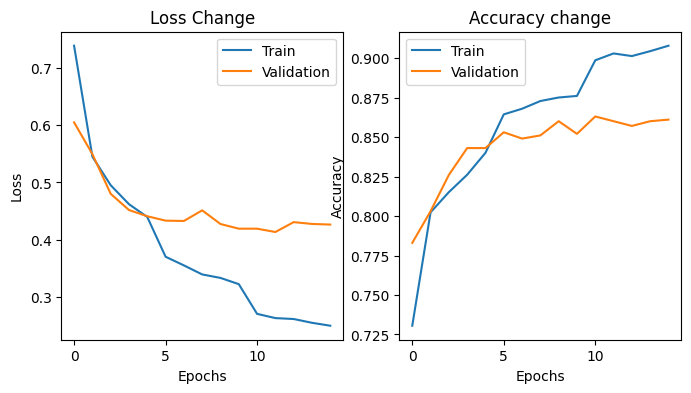

In [263]:
plot_curves(history_25)

#### Model 26: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 20 epochs,  batch = 2

In [264]:
name_model_26 ='26: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  20 epochs,  batch = 2'

In [265]:
epochs = 20
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [266]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [267]:
model_26 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [268]:
model_26.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [269]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [270]:
start_model_26 = time.time()

In [271]:
history_26 = model_26.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 69s 13ms/step - accuracy: 0.4553 - loss: 1.3567 - val_accuracy: 0.6280 - val_loss: 0.8952 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.5994 - loss: 1.0217 - val_accuracy: 0.6530 - val_loss: 0.8275 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.6424 - loss: 0.9336 - val_accuracy: 0.6780 - val_loss: 0.8345 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 86s 14ms/step - accuracy: 0.6563 - loss: 0.8955 - val_accuracy: 0.6970 - val_loss: 0.8151 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 87s 14ms/step - accuracy: 0.6556 - loss: 0.8827 - val_accuracy: 0.6890 - val_loss: 0.8723 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.6906 - loss: 0.8237 - val_accuracy: 0.7040 - val_loss: 0.7031 - learning_rate: 5.0000e-04
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - ac

In [272]:
end_model_26  = time.time() - start_model_26

In [273]:
test_loss_model_26 , test_acc_model_26  = model_26.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_26 )
print('Test loss:', test_loss_model_26 )
print ('Learning time, sec:', f'{end_model_26:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7529 - loss: 0.6084
Test accuracy: 0.7519999742507935
Test loss: 0.6133370995521545
Learning time, sec: 1608.23


In [274]:
model_26.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

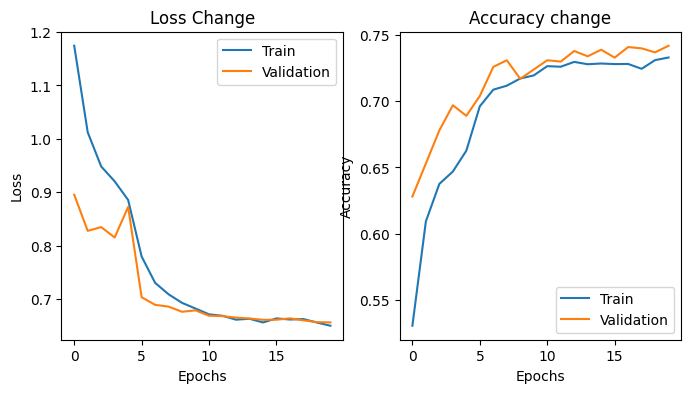

In [275]:
plot_curves(history_26)

#### Model 27: Adam - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 20 epochs,  batch = 2

In [276]:
name_model_27 ='27: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  20 epochs,  batch = 2'

In [277]:
epochs = 20
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [278]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.001    
    elif epoch < 15:
        return 0.0005
    else:
        return 0.0001

In [279]:
model_27 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [280]:
model_27.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [281]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [282]:
start_model_27 = time.time()

In [283]:
history_27 = model_27.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 72s 14ms/step - accuracy: 0.4869 - loss: 1.2993 - val_accuracy: 0.6670 - val_loss: 0.8907 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 93s 16ms/step - accuracy: 0.6267 - loss: 0.9936 - val_accuracy: 0.6810 - val_loss: 0.8846 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 73s 14ms/step - accuracy: 0.6604 - loss: 0.9168 - val_accuracy: 0.6610 - val_loss: 0.8896 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.6723 - loss: 0.8917 - val_accuracy: 0.7150 - val_loss: 0.7706 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.6756 - loss: 0.8492 - val_accuracy: 0.7170 - val_loss: 0.7959 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.6970 - loss: 0.7857 - val_accuracy: 0.7490 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accura

In [284]:
end_model_27  = time.time() - start_model_27

In [285]:
test_loss_model_27 , test_acc_model_27  = model_27.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_27 )
print('Test loss:', test_loss_model_27 )
print ('Learning time, sec:', f'{end_model_27:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7903 - loss: 0.5250
Test accuracy: 0.7864999771118164
Test loss: 0.5409536361694336
Learning time, sec: 1594.87


In [286]:
model_27.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

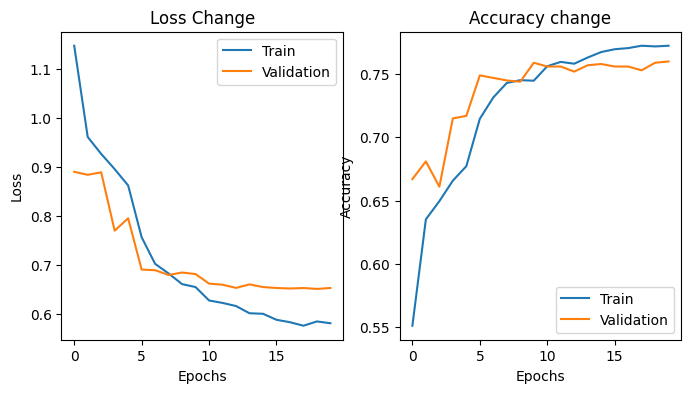

In [287]:
plot_curves(history_27)

### SGD settings

#### Model 28: SGD - Hidden ReLU (128) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [288]:
name_model_28 = '28: SGD - Hidden ReLU (128) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [289]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [290]:
model_28 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [291]:
model_28.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [292]:
start_model_28 = time.time()

In [293]:
history_28 = model_28.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6221 - loss: 1.0993 - val_accuracy: 0.7560 - val_loss: 0.6397
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7811 - loss: 0.6042 - val_accuracy: 0.8090 - val_loss: 0.5308
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8157 - loss: 0.5060 - val_accuracy: 0.8340 - val_loss: 0.4779
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.8392 - loss: 0.4547 - val_accuracy: 0.8080 - val_loss: 0.5117
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.8292 - loss: 0.4560 - val_accuracy: 0.8340 - val_loss: 0.4878
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8522 - loss: 0.4180 - val_accuracy: 0.8280 - val_loss: 0.4803
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8560 - loss: 0.4040 - val_accuracy: 0.8520 - val_loss: 0.4466
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8631 -

In [294]:
end_model_28  = time.time() - start_model_28

In [295]:
test_loss_model_28 , test_acc_model_28  = model_28.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_28 )
print('Test loss:', test_loss_model_28 )
print ('Learning time, sec:', f'{end_model_28:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8745 - loss: 0.3456
Test accuracy: 0.8689000010490417
Test loss: 0.3614674508571625
Learning time, sec: 401.75


In [296]:
model_28.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

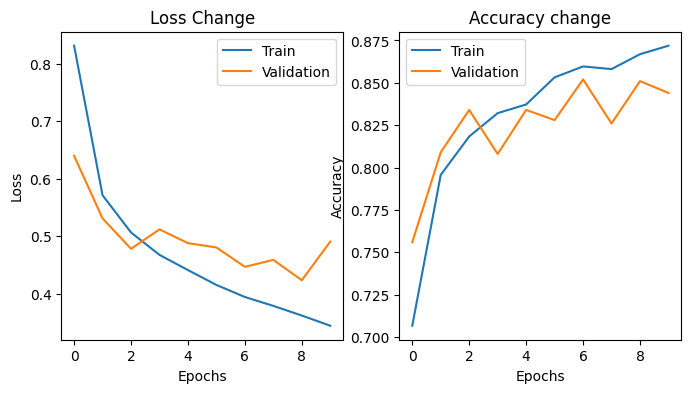

In [297]:
plot_curves(history_28)

#### Model 29: SGD - Hidden ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [298]:
name_model_29 ='29: SGD - Hidden ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [299]:
epochs = 10
batch_size = 4

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [300]:
model_29 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [301]:
model_29.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [302]:
start_model_29 = time.time()

In [303]:
history_29 = model_29.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.5822 - loss: 1.1856 - val_accuracy: 0.7750 - val_loss: 0.6571
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7712 - loss: 0.6223 - val_accuracy: 0.8030 - val_loss: 0.5468
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7945 - loss: 0.5723 - val_accuracy: 0.8100 - val_loss: 0.5186
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8142 - loss: 0.5108 - val_accuracy: 0.8160 - val_loss: 0.4964
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8189 - loss: 0.4951 - val_accuracy: 0.8160 - val_loss: 0.5166
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.8304 - loss: 0.4667 - val_accuracy: 0.8300 - val_loss: 0.4684
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.8388 - loss: 0.4365 - val_accuracy: 0.8430 - val_loss: 0.4589
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8492 -

In [304]:
end_model_29  = time.time() - start_model_29

In [305]:
test_loss_model_29 , test_acc_model_29  = model_29.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_29 )
print('Test loss:', test_loss_model_29 )
print ('Learning time, sec:', f'{end_model_29:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8794 - loss: 0.3277
Test accuracy: 0.8741000294685364
Test loss: 0.3414883017539978
Learning time, sec: 351.06


In [306]:
model_29.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

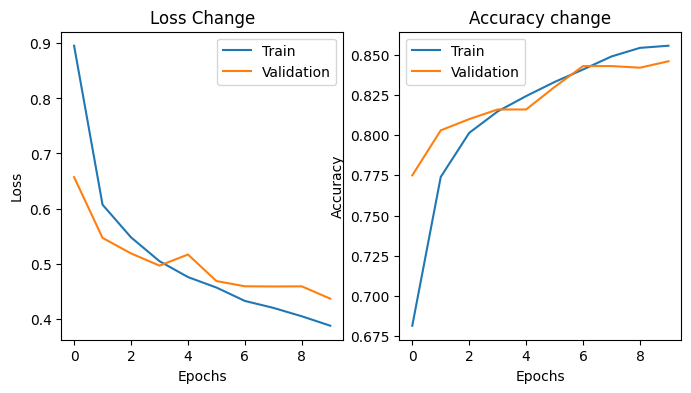

In [307]:
plot_curves(history_29)

#### Model 30: SGD - Hidden ReLU (128, L1) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [308]:
name_model_30 ='30: SGD - Hidden ReLU (128, L1) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [309]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [310]:
model_30 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [311]:
model_30.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [312]:
start_model_30 = time.time()

In [313]:
history_30 = model_30.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.5356 - loss: 15.8551 - val_accuracy: 0.6880 - val_loss: 1.5609
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.5931 - loss: 1.7373 - val_accuracy: 0.6270 - val_loss: 1.6697
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.6159 - loss: 1.6586 - val_accuracy: 0.6960 - val_loss: 1.4768
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.6226 - loss: 1.6562 - val_accuracy: 0.6100 - val_loss: 1.6298
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.6249 - loss: 1.6557 - val_accuracy: 0.7150 - val_loss: 1.3526
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.6554 - loss: 1.5879 - val_accuracy: 0.6960 - val_loss: 1.4243
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.6525 - loss: 1.5674 - val_accuracy: 0.6960 - val_loss: 1.5860
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.6470 

In [314]:
end_model_30  = time.time() - start_model_30 

In [315]:
test_loss_model_30, test_acc_model_30  = model_30.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_30 )
print('Test loss:', test_loss_model_30 )
print ('Learning time, sec:', f'{end_model_30:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7442 - loss: 1.3403
Test accuracy: 0.745199978351593
Test loss: 1.343497633934021
Learning time, sec: 367.20


In [316]:
model_30.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

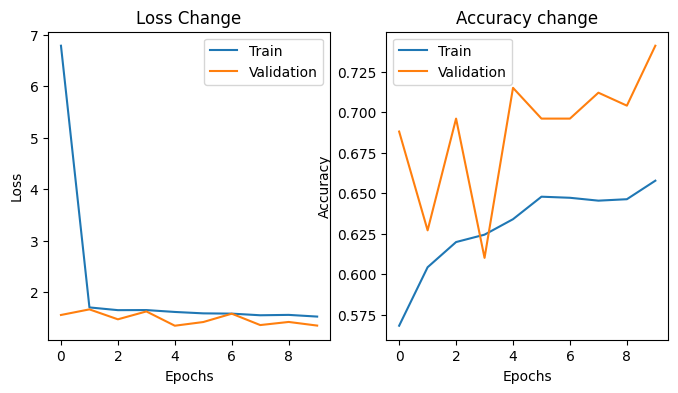

In [317]:
plot_curves(history_30)

#### Model 31: SGD - Hidden ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [318]:
name_model_31 ='31: SGD - Hidden ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [319]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [320]:
model_31 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [321]:
model_31.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [322]:
start_model_31 = time.time()

In [323]:
history_31 = model_31.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.5775 - loss: 2.9857 - val_accuracy: 0.7800 - val_loss: 1.5843
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.7566 - loss: 1.4739 - val_accuracy: 0.8060 - val_loss: 0.9954
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.7826 - loss: 0.9846 - val_accuracy: 0.8230 - val_loss: 0.7749
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7912 - loss: 0.7976 - val_accuracy: 0.7850 - val_loss: 0.7420
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.7858 - loss: 0.7188 - val_accuracy: 0.8140 - val_loss: 0.6366
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8041 - loss: 0.6715 - val_accuracy: 0.7810 - val_loss: 0.6957
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.8002 - loss: 0.6567 - val_accuracy: 0.7910 - val_loss: 0.6596
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8096 -

In [324]:
end_model_31  = time.time() - start_model_31 

In [325]:
test_loss_model_31 , test_acc_model_31  = model_31.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_31 )
print('Test loss:', test_loss_model_31 )
print ('Learning time, sec:', f'{end_model_31:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8238 - loss: 0.6267
Test accuracy: 0.8172000050544739
Test loss: 0.6382173895835876
Learning time, sec: 390.60


In [326]:
model_31.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

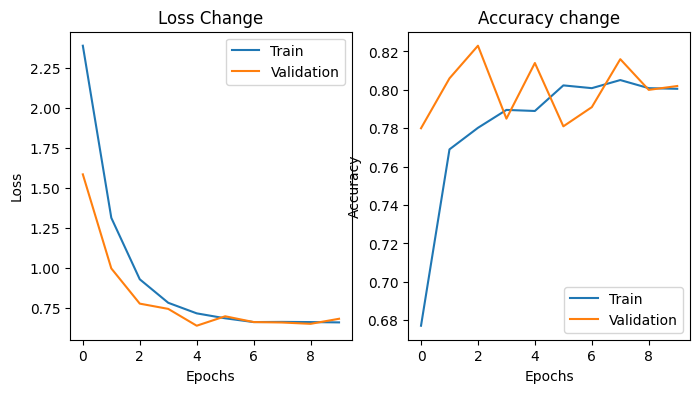

In [327]:
plot_curves(history_31)

#### Model 32: SGD - Hidden ReLU (128, L1+L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [328]:
name_model_32 ='32: Adam - Hidden ReLU (128, L1+L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [329]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [330]:
model_32 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [331]:
model_32.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [332]:
start_model_32 = time.time()

In [333]:
history_32 = model_32.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.5057 - loss: 15.7349 - val_accuracy: 0.6280 - val_loss: 1.6230
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.5763 - loss: 1.7728 - val_accuracy: 0.7010 - val_loss: 1.4286
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.6072 - loss: 1.7065 - val_accuracy: 0.6800 - val_loss: 1.6238
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6116 - loss: 1.6870 - val_accuracy: 0.6870 - val_loss: 1.5117
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.6306 - loss: 1.6366 - val_accuracy: 0.7250 - val_loss: 1.4356
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.6210 - loss: 1.6198 - val_accuracy: 0.7180 - val_loss: 1.5031
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.6217 - loss: 1.6580 - val_accuracy: 0.6200 - val_loss: 1.7337
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.6258 

In [334]:
end_model_32  = time.time() - start_model_32 

In [335]:
test_loss_model_32 , test_acc_model_32  = model_32.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_32 )
print('Test loss:', test_loss_model_32 )
print ('Learning time, sec:', f'{end_model_32:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6638 - loss: 1.4727
Test accuracy: 0.6643999814987183
Test loss: 1.4773684740066528
Learning time, sec: 399.65


In [336]:
model_32.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

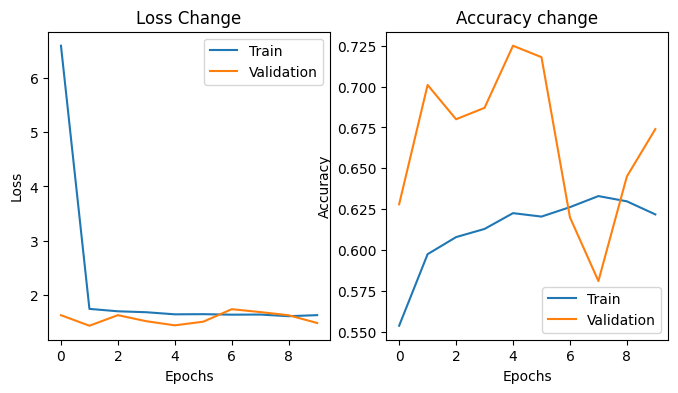

In [337]:
plot_curves(history_32)

#### Model 33: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [338]:
name_model_33 ='33: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [339]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [340]:
model_33 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [341]:
model_33.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [342]:
start_model_33 = time.time()

In [343]:
history_33 = model_33.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.4136 - loss: 1.6417 - val_accuracy: 0.7190 - val_loss: 0.7857
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.6976 - loss: 0.8016 - val_accuracy: 0.7410 - val_loss: 0.6658
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.7383 - loss: 0.6971 - val_accuracy: 0.7640 - val_loss: 0.6092
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.7598 - loss: 0.6454 - val_accuracy: 0.7910 - val_loss: 0.5671
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7786 - loss: 0.6040 - val_accuracy: 0.7960 - val_loss: 0.5499
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.7857 - loss: 0.5777 - val_accuracy: 0.8040 - val_loss: 0.5419
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.7908 - loss: 0.5735 - val_accuracy: 0.8080 - val_loss: 0.5014
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7937 -

In [344]:
end_model_33 = time.time() - start_model_33

In [345]:
test_loss_model_33 , test_acc_model_33  = model_33.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_33 )
print('Test loss:', test_loss_model_33)
print ('Learning time, sec:', f'{end_model_33:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8398 - loss: 0.4455
Test accuracy: 0.8317999839782715
Test loss: 0.4577033221721649
Learning time, sec: 387.05


In [346]:
model_33.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

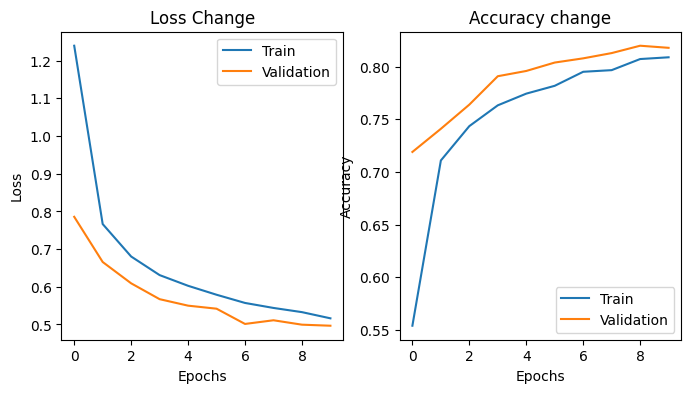

In [347]:
plot_curves(history_33)

#### Model 34: SVD - Hidden Tanh  (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [348]:
name_model_34 ='34: Adam - Hidden Tanh (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [349]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [350]:
model_34 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='tanh', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [351]:
model_34.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [352]:
start_model_34 = time.time()

In [353]:
history_34 = model_34.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.6281 - loss: 1.0602 - val_accuracy: 0.7940 - val_loss: 0.5825
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.7881 - loss: 0.5798 - val_accuracy: 0.8130 - val_loss: 0.5273
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.8085 - loss: 0.5329 - val_accuracy: 0.8100 - val_loss: 0.5116
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.8105 - loss: 0.5076 - val_accuracy: 0.8080 - val_loss: 0.5097
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8277 - loss: 0.4746 - val_accuracy: 0.8340 - val_loss: 0.4902
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8412 - loss: 0.4426 - val_accuracy: 0.8240 - val_loss: 0.4830
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8505 - loss: 0.4185 - val_accuracy: 0.8180 - val_loss: 0.5198
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8486 -

In [354]:
end_model_34  = time.time() - start_model_34

In [355]:
test_loss_model_34 , test_acc_model_34  = model_34.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_15 )
print('Test loss:', test_loss_model_15 )
print ('Learning time, sec:', f'{end_model_15:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8811 - loss: 0.3314
Test accuracy: 0.8636999726295471
Test loss: 0.37502190470695496
Learning time, sec: 399.50


In [356]:
model_34.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

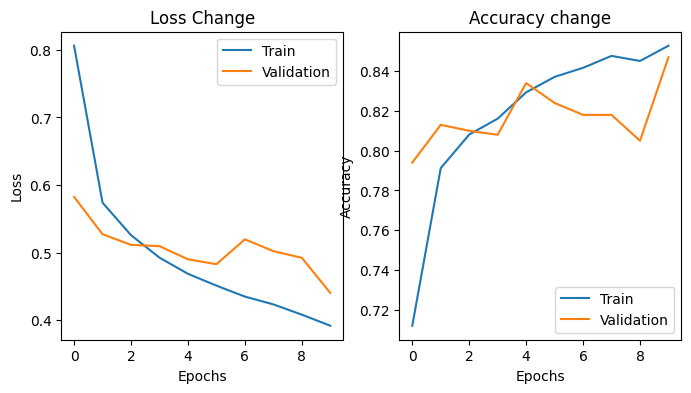

In [357]:
plot_curves(history_34)

#### Model 35: SGD - Hidden Tanh  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [358]:
name_model_35 ='35: SGD - Hidden Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [359]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [360]:
model_35 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='tanh', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [361]:
model_35.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [362]:
start_model_35 = time.time()

In [363]:
history_35 = model_35.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.5998 - loss: 1.1523 - val_accuracy: 0.7870 - val_loss: 0.5731
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7840 - loss: 0.6011 - val_accuracy: 0.8200 - val_loss: 0.5134
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 54s 16ms/step - accuracy: 0.8034 - loss: 0.5403 - val_accuracy: 0.8060 - val_loss: 0.5084
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.8234 - loss: 0.4990 - val_accuracy: 0.8210 - val_loss: 0.5130
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8394 - loss: 0.4492 - val_accuracy: 0.8210 - val_loss: 0.4681
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.8356 - loss: 0.4429 - val_accuracy: 0.8510 - val_loss: 0.4439
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8467 - loss: 0.4282 - val_accuracy: 0.8410 - val_loss: 0.4492
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8506 -

In [364]:
end_model_35  = time.time() - start_model_35

In [365]:
test_loss_model_35 , test_acc_model_35  = model_35.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_35 )
print('Test loss:', test_loss_model_35 )
print ('Learning time, sec:', f'{end_model_35:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8699 - loss: 0.3569
Test accuracy: 0.8646000027656555
Test loss: 0.371697336435318
Learning time, sec: 391.17


In [366]:
model_35.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

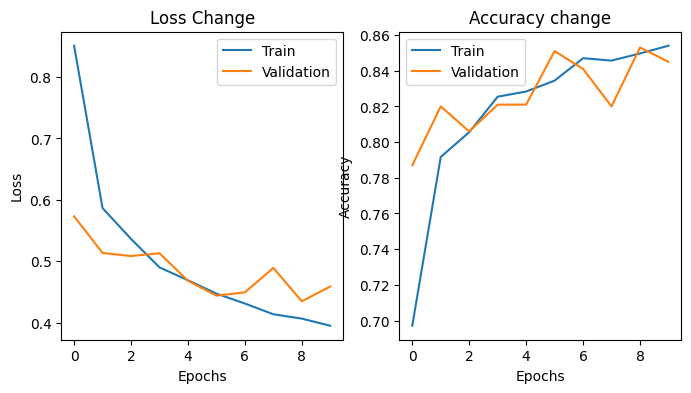

In [367]:
plot_curves(history_35)

#### Model 36: SGD - Hidden Leaky_relu  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [495]:
name_model_36 ='36: SGD - Hidden Leaky_relu (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [496]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [497]:
model_36 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='leaky_relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [498]:
model_36.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [499]:
start_model_36 = time.time()

In [500]:
history_36 = model_36.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - accuracy: 0.5859 - loss: 1.1511 - val_accuracy: 0.7830 - val_loss: 0.6104
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.7677 - loss: 0.6381 - val_accuracy: 0.8160 - val_loss: 0.5232
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.8009 - loss: 0.5530 - val_accuracy: 0.8250 - val_loss: 0.4970
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.8259 - loss: 0.4893 - val_accuracy: 0.8260 - val_loss: 0.4950
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.8216 - loss: 0.4919 - val_accuracy: 0.8150 - val_loss: 0.5039
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8430 - loss: 0.4460 - val_accuracy: 0.8330 - val_loss: 0.4668
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8436 - loss: 0.4202 - val_accuracy: 0.8430 - val_loss: 0.4578
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - accuracy: 0.8521 -

In [501]:
end_model_36  = time.time() - start_model_36

In [502]:
test_loss_model_36 , test_acc_model_36  = model_36.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_36 )
print('Test loss:', test_loss_model_36 )
print ('Learning time, sec:', f'{end_model_36:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8749 - loss: 0.3391
Test accuracy: 0.8672000169754028
Test loss: 0.3578299283981323
Learning time, sec: 495.79


In [503]:
model_36.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

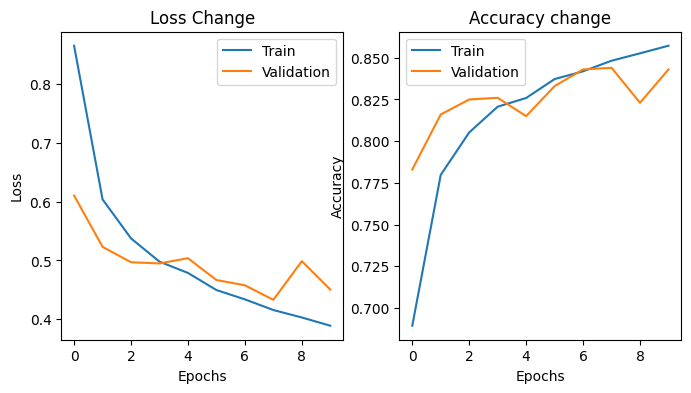

In [504]:
plot_curves(history_36)

#### Model 37: SGD - Hidden ReLU  (128) + Drop (0.2) + Sigmoid (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [378]:
name_model_37 ='37: SGD - Hidden Relu (128) + Drop (0.2) + Sigmoid (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [379]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [380]:
model_37 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='sigmoid', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [381]:
model_37.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [382]:
start_model_37 = time.time()

In [383]:
history_37 = model_37.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.4633 - loss: 1.6899 - val_accuracy: 0.7220 - val_loss: 0.8073
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.7204 - loss: 0.7897 - val_accuracy: 0.7510 - val_loss: 0.6958
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7566 - loss: 0.6685 - val_accuracy: 0.7500 - val_loss: 0.6194
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7813 - loss: 0.6050 - val_accuracy: 0.7910 - val_loss: 0.5802
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.7943 - loss: 0.5717 - val_accuracy: 0.8270 - val_loss: 0.5249
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8159 - loss: 0.5211 - val_accuracy: 0.8080 - val_loss: 0.5380
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8131 - loss: 0.5222 - val_accuracy: 0.8270 - val_loss: 0.4938
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8240 -

In [384]:
end_model_37  = time.time() - start_model_37

In [385]:
test_loss_model_37 , test_acc_model_37  = model_37.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_37 )
print('Test loss:', test_loss_model_37 )
print ('Learning time, sec:', f'{end_model_37:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8520 - loss: 0.4148
Test accuracy: 0.8449000120162964
Test loss: 0.42956605553627014
Learning time, sec: 386.80


In [386]:
model_37.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

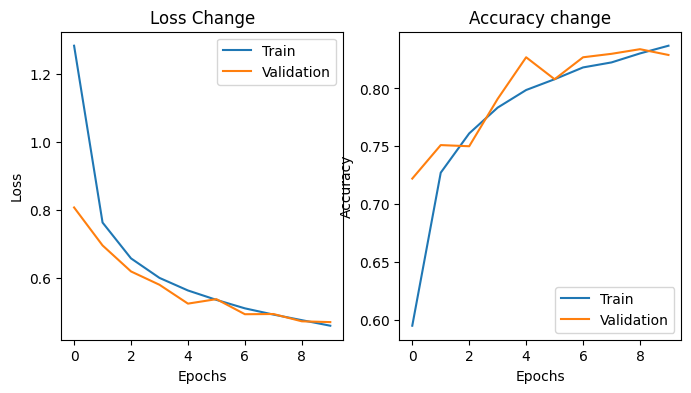

In [387]:
plot_curves(history_37)

#### Model 38: SGD - Hidden ReLU  (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [388]:
name_model_38 ='38: Adam - Hidden ReLU (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [389]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [390]:
model_38 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='relu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [391]:
model_38.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [392]:
start_model_38 = time.time()

In [393]:
history_38 = model_38.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.5985 - loss: 1.1635 - val_accuracy: 0.7600 - val_loss: 0.6509
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.7750 - loss: 0.6340 - val_accuracy: 0.8080 - val_loss: 0.5272
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.7950 - loss: 0.5486 - val_accuracy: 0.8020 - val_loss: 0.5381
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8168 - loss: 0.5072 - val_accuracy: 0.8200 - val_loss: 0.4865
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8302 - loss: 0.4770 - val_accuracy: 0.8150 - val_loss: 0.5329
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.8317 - loss: 0.4590 - val_accuracy: 0.8230 - val_loss: 0.4606
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8390 - loss: 0.4219 - val_accuracy: 0.8250 - val_loss: 0.4839
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8476 -

In [394]:
end_model_38  = time.time() - start_model_38

In [395]:
test_loss_model_38 , test_acc_model_38  = model_38.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_38 )
print('Test loss:', test_loss_model_38 )
print ('Learning time, sec:', f'{end_model_38:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8858 - loss: 0.3123
Test accuracy: 0.8774999976158142
Test loss: 0.3343028426170349
Learning time, sec: 357.53


In [396]:
model_38.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

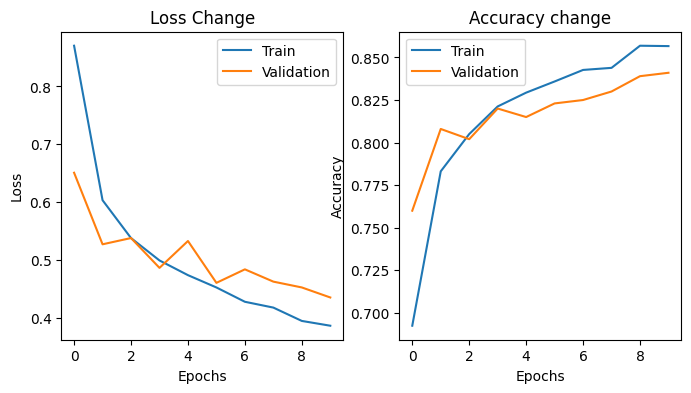

In [397]:
plot_curves(history_38)

#### Model 39: SGD - Hidden Silu  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [398]:
name_model_39 ='39: Adam - Hidden Silu (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [399]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [400]:
model_39 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='silu', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [401]:
model_39.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [402]:
start_model_39 = time.time()

In [403]:
history_39 = model_39.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.5788 - loss: 1.2101 - val_accuracy: 0.7610 - val_loss: 0.6718
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.7793 - loss: 0.6280 - val_accuracy: 0.8020 - val_loss: 0.5406
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8068 - loss: 0.5337 - val_accuracy: 0.8080 - val_loss: 0.5176
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.8219 - loss: 0.4983 - val_accuracy: 0.8330 - val_loss: 0.4702
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8290 - loss: 0.4647 - val_accuracy: 0.8240 - val_loss: 0.4955
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8362 - loss: 0.4405 - val_accuracy: 0.8440 - val_loss: 0.4489
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8357 - loss: 0.4386 - val_accuracy: 0.8350 - val_loss: 0.4483
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.8461 -

In [404]:
end_model_39  = time.time() - start_model_39

In [405]:
test_loss_model_39 , test_acc_model_39  = model_39.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_39 )
print('Test loss:', test_loss_model_39 )
print ('Learning time, sec:', f'{end_model_39:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8853 - loss: 0.3346
Test accuracy: 0.8737000226974487
Test loss: 0.3495948314666748
Learning time, sec: 404.32


In [406]:
model_39.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

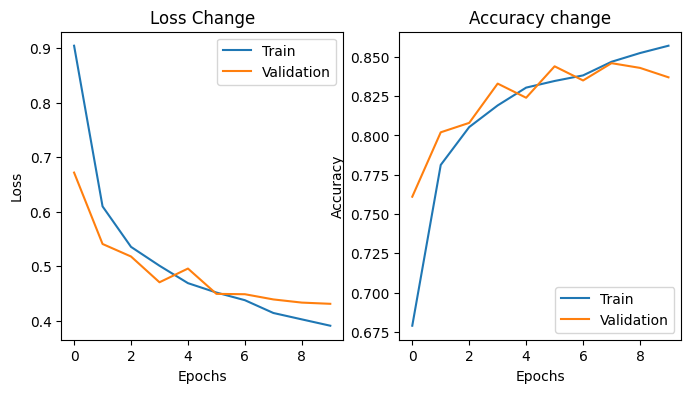

In [407]:
plot_curves(history_39)

#### Model 40: SGD - Hidden Sgmoid (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [408]:
name_model_40 ='40: SGD - Hidden Sigmoid (128) + Drop (0.2) + Leaky ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [409]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [410]:
model_40 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [411]:
model_40.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [412]:
start_model_40 = time.time()

In [413]:
history_40 = model_40.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.4286 - loss: 1.6243 - val_accuracy: 0.7260 - val_loss: 0.7473
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7174 - loss: 0.7619 - val_accuracy: 0.7520 - val_loss: 0.6412
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.7493 - loss: 0.6733 - val_accuracy: 0.7680 - val_loss: 0.5976
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.7643 - loss: 0.6201 - val_accuracy: 0.7780 - val_loss: 0.5755
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7736 - loss: 0.5972 - val_accuracy: 0.7960 - val_loss: 0.5531
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7864 - loss: 0.5667 - val_accuracy: 0.8000 - val_loss: 0.5616
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7943 - loss: 0.5563 - val_accuracy: 0.8120 - val_loss: 0.5187
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8018 -

In [414]:
end_model_40  = time.time() - start_model_40

In [415]:
test_loss_model_40 , test_acc_model_40  = model_40.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_40 )
print('Test loss:', test_loss_model_40 )
print ('Learning time, sec:', f'{end_model_40:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8369 - loss: 0.4458
Test accuracy: 0.8303999900817871
Test loss: 0.4571104347705841
Learning time, sec: 372.41


In [416]:
model_40.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

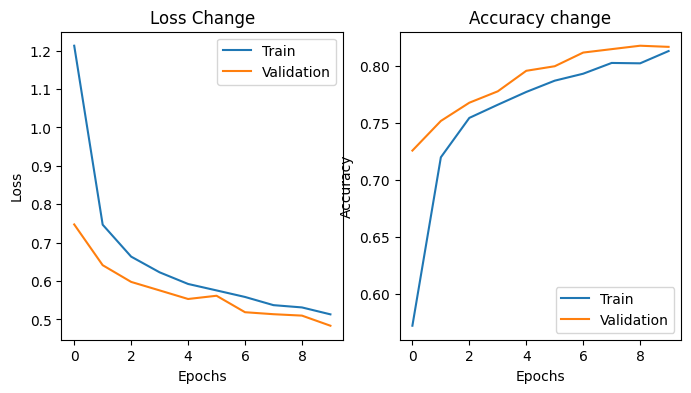

In [417]:
plot_curves(history_40)

#### Model 41: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Drop (0.2) + Output Softmax (10) - 10 epochs,  batch = 4

In [418]:
name_model_41 ='41: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Drop (0.2) + Output Softmax (10) - 10 epochs,  batch = 4'

In [419]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [420]:
model_41 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [421]:
model_41.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [422]:
start_model_41 = time.time()

In [423]:
history_41 = model_41.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.3609 - loss: 1.7631 - val_accuracy: 0.6850 - val_loss: 0.8178
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.6682 - loss: 0.8867 - val_accuracy: 0.7240 - val_loss: 0.6880
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7083 - loss: 0.7636 - val_accuracy: 0.7500 - val_loss: 0.6358
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7263 - loss: 0.6993 - val_accuracy: 0.7750 - val_loss: 0.5942
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.7565 - loss: 0.6624 - val_accuracy: 0.7910 - val_loss: 0.5620
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.7671 - loss: 0.6213 - val_accuracy: 0.7970 - val_loss: 0.5381
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.7815 - loss: 0.5921 - val_accuracy: 0.8080 - val_loss: 0.5400
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7808 -

In [424]:
end_model_41  = time.time() - start_model_41

In [425]:
test_loss_model_41 , test_acc_model_41  = model_41.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_41 )
print('Test loss:', test_loss_model_41 )
print ('Learning time, sec:', f'{end_model_41:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8315 - loss: 0.4744
Test accuracy: 0.8252000212669373
Test loss: 0.48062875866889954
Learning time, sec: 369.62


In [426]:
model_41.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop2 (Dropout)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

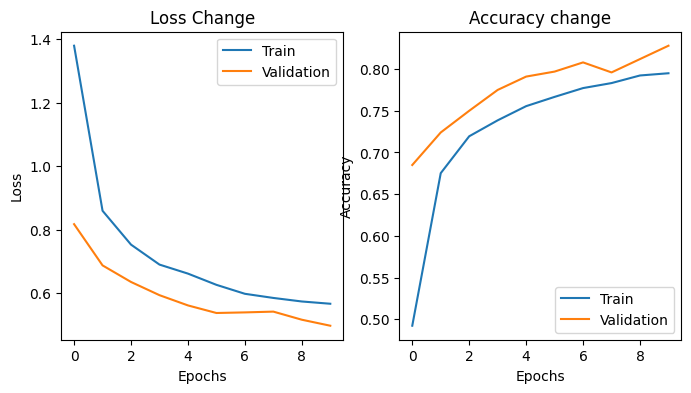

In [427]:
plot_curves(history_41)

#### Model 42: SGD - Hidden Sigmoid  (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4

In [428]:
name_model_42 ='42: SGD - Hidden Sigm (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 10 epochs,  batch = 4'

In [429]:
epochs = 10
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [430]:
model_42 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [431]:
model_42.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [432]:
start_model_42 = time.time()

In [433]:
history_42 = model_42.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.3979 - loss: 3.4880 - val_accuracy: 0.7080 - val_loss: 1.7893
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6931 - loss: 1.6804 - val_accuracy: 0.7270 - val_loss: 1.1886
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.7113 - loss: 1.1762 - val_accuracy: 0.7450 - val_loss: 0.9354
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.7339 - loss: 0.9709 - val_accuracy: 0.7720 - val_loss: 0.8232
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.7466 - loss: 0.8738 - val_accuracy: 0.7780 - val_loss: 0.7724
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.7447 - loss: 0.8472 - val_accuracy: 0.7830 - val_loss: 0.7429
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.7470 - loss: 0.8325 - val_accuracy: 0.7670 - val_loss: 0.7562
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.7479 -

In [434]:
end_model_42  = time.time() - start_model_42

In [435]:
test_loss_model_42 , test_acc_model_42  = model_42.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_42 )
print('Test loss:', test_loss_model_42 )
print ('Learning time, sec:', f'{end_model_42:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7792 - loss: 0.7244
Test accuracy: 0.7764999866485596
Test loss: 0.7304365038871765
Learning time, sec: 385.40


In [436]:
model_42.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

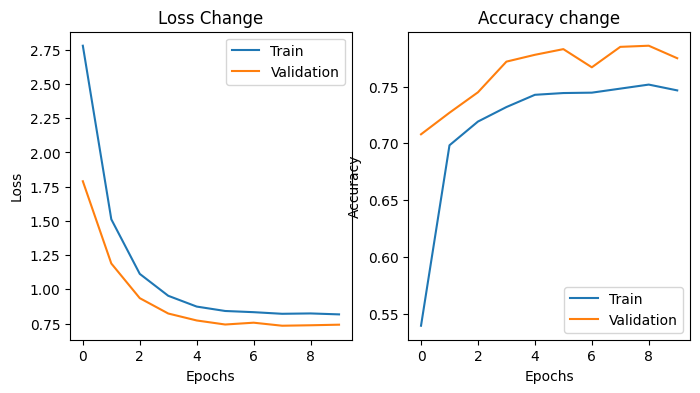

In [437]:
plot_curves(history_42)

#### Model 43: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 4

In [438]:
name_model_43 ='43: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 4'

In [439]:
epochs = 15
batch_size = 4


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [440]:
model_43 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [441]:
model_43.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [442]:
start_model_43 = time.time()

In [443]:
history_43 = model_43.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.4094 - loss: 1.6601 - val_accuracy: 0.6990 - val_loss: 0.8193
Epoch 2/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7026 - loss: 0.8025 - val_accuracy: 0.7540 - val_loss: 0.6507
Epoch 3/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7297 - loss: 0.7075 - val_accuracy: 0.7580 - val_loss: 0.6139
Epoch 4/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7676 - loss: 0.6311 - val_accuracy: 0.7870 - val_loss: 0.5794
Epoch 5/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.7724 - loss: 0.6154 - val_accuracy: 0.7950 - val_loss: 0.5544
Epoch 6/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7897 - loss: 0.5754 - val_accuracy: 0.8030 - val_loss: 0.5347
Epoch 7/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8009 - loss: 0.5469 - val_accuracy: 0.8040 - val_loss: 0.5360
Epoch 8/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8001 -

In [444]:
end_model_43  = time.time() - start_model_43

In [445]:
test_loss_model_43 , test_acc_model_43  = model_43.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_43 )
print('Test loss:', test_loss_model_43 )
print ('Learning time, sec:', f'{end_model_43:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8479 - loss: 0.4216
Test accuracy: 0.8407999873161316
Test loss: 0.43443578481674194
Learning time, sec: 597.01


In [446]:
model_43.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

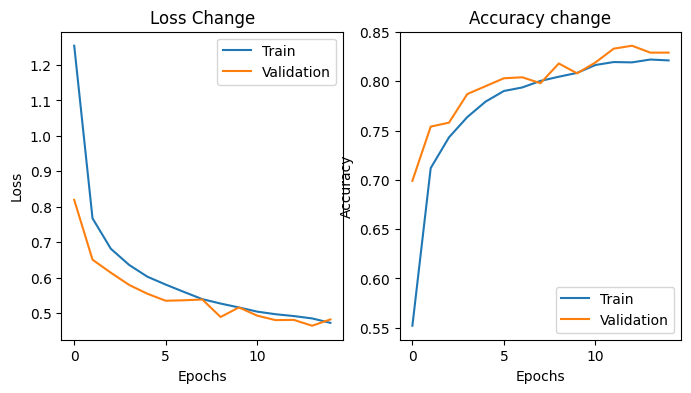

In [447]:
plot_curves(history_43)

#### Model 44: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 2

In [448]:
name_model_44 ='44: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - 15 epochs,  batch = 2'

In [449]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [450]:
model_44 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [451]:
model_44.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [452]:
start_model_44 = time.time()

In [453]:
history_44 = model_44.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1)

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.4750 - loss: 1.4524 - val_accuracy: 0.7380 - val_loss: 0.6792
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.7326 - loss: 0.6960 - val_accuracy: 0.7590 - val_loss: 0.6545
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.7658 - loss: 0.6294 - val_accuracy: 0.7770 - val_loss: 0.5764
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.7826 - loss: 0.5836 - val_accuracy: 0.8160 - val_loss: 0.5326
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.7999 - loss: 0.5504 - val_accuracy: 0.8260 - val_loss: 0.4995
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - accuracy: 0.8090 - loss: 0.5204 - val_accuracy: 0.8210 - val_loss: 0.4895
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.8168 - loss: 0.5148 - val_accuracy: 0.8160 - val_loss: 0.5143
Epoch 8/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.8181 -

In [454]:
end_model_44  = time.time() - start_model_44

In [455]:
test_loss_model_44 , test_acc_model_44  = model_44.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_44 )
print('Test loss:', test_loss_model_44 )
print ('Learning time, sec:', f'{end_model_44:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8704 - loss: 0.3559
Test accuracy: 0.8634999990463257
Test loss: 0.3726716935634613
Learning time, sec: 1043.02


In [456]:
model_44.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

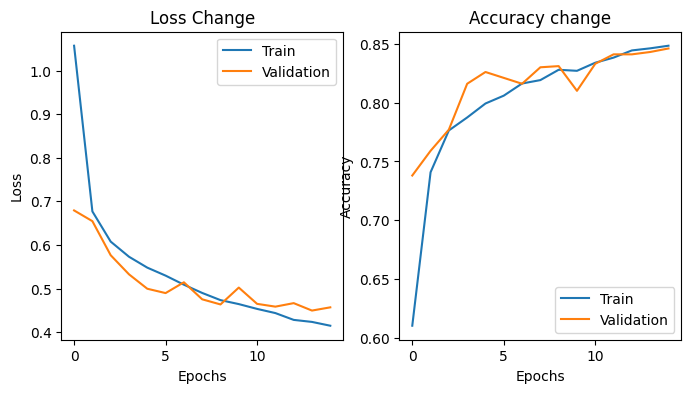

In [457]:
plot_curves(history_44)

#### Model 45: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [458]:
name_model_45 ='45: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [459]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.SGD()

In [460]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [461]:
model_45 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [462]:
model_45.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [463]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [464]:
start_model_45 = time.time()

In [552]:
history_45 = model_45.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.4595 - loss: 1.4953 - val_accuracy: 0.7420 - val_loss: 0.6759 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 71s 16ms/step - accuracy: 0.7334 - loss: 0.7058 - val_accuracy: 0.7410 - val_loss: 0.6259 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 91s 18ms/step - accuracy: 0.7704 - loss: 0.6148 - val_accuracy: 0.7850 - val_loss: 0.5657 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - accuracy: 0.7812 - loss: 0.5813 - val_accuracy: 0.8040 - val_loss: 0.5488 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 86s 18ms/step - accuracy: 0.8028 - loss: 0.5438 - val_accuracy: 0.8170 - val_loss: 0.5146 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 79s 17ms/step - accuracy: 0.8284 - loss: 0.4822 - val_accuracy: 0.8300 - val_loss: 0.4831 - learning_rate: 0.0010
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 17ms/step - accura

In [466]:
end_model_45  = time.time() - start_model_45

In [548]:
test_loss_model_45 , test_acc_model_45  = model_45.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_45 )
print('Test loss:', test_loss_model_45 )
print ('Learning time, sec:', f'{end_model_45:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0703 - loss: 2.4194
Test accuracy: 0.07339999824762344
Test loss: 2.4114785194396973
Learning time, sec: 1118.70


In [468]:
model_45.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

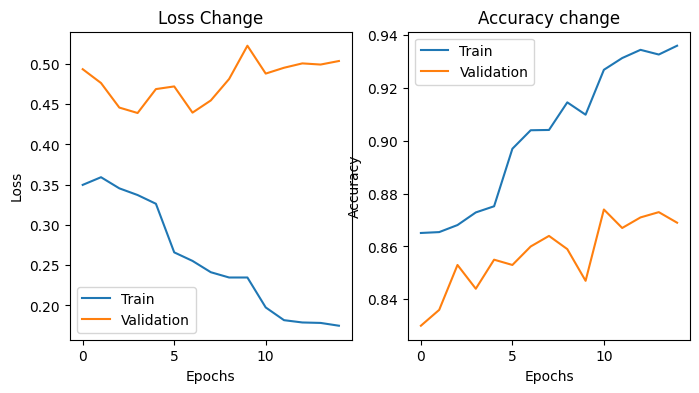

In [469]:
plot_curves(history_45)

#### Model 46: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 20 epochs,  batch = 2

In [470]:
name_model_46 ='46: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  20 epochs,  batch = 2'

In [471]:
epochs = 20
batch_size = 2


optimizer = tf.keras.optimizers.SGD()

In [472]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [473]:
model_46 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [474]:
model_46.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [475]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [476]:
start_model_46 = time.time()

In [477]:
history_46 = model_46.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.4821 - loss: 1.4243 - val_accuracy: 0.7450 - val_loss: 0.6870 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.7360 - loss: 0.7018 - val_accuracy: 0.7840 - val_loss: 0.5919 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - accuracy: 0.7757 - loss: 0.6034 - val_accuracy: 0.7940 - val_loss: 0.5541 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - accuracy: 0.7840 - loss: 0.5818 - val_accuracy: 0.8140 - val_loss: 0.5120 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 0.8045 - loss: 0.5588 - val_accuracy: 0.8080 - val_loss: 0.5383 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.8111 - loss: 0.5151 - val_accuracy: 0.8250 - val_loss: 0.4882 - learning_rate: 5.0000e-04
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - ac

In [478]:
end_model_46  = time.time() - start_model_46

In [479]:
test_loss_model_46 , test_acc_model_46  = model_46.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_46 )
print('Test loss:', test_loss_model_46 )
print ('Learning time, sec:', f'{end_model_46:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8461 - loss: 0.4379
Test accuracy: 0.8374000191688538
Test loss: 0.4490298330783844
Learning time, sec: 1529.35


In [480]:
model_46.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

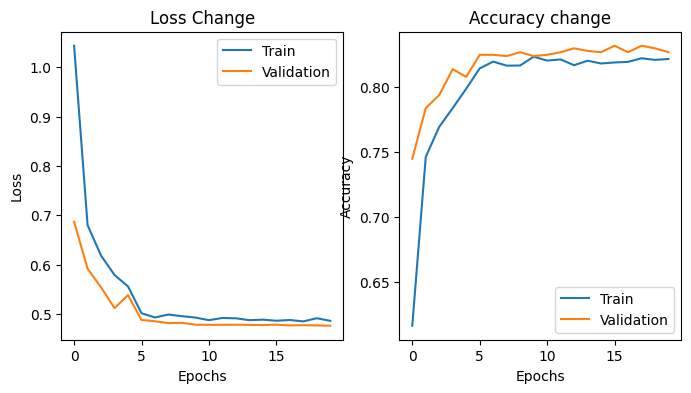

In [481]:
plot_curves(history_46)

#### Model 47: SGD - Hidden Sigmoid  (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 20 epochs,  batch = 2

In [482]:
name_model_47 ='47: SGD - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  20 epochs,  batch = 2'

In [483]:
epochs = 20
batch_size = 2


optimizer = tf.keras.optimizers.SGD()

In [484]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.001    
    elif epoch < 15:
        return 0.0005
    else:
        return 0.0001

In [485]:
model_47 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [486]:
model_47.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [487]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [488]:
start_model_47 = time.time()

In [489]:
history_47 = model_47.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 57s 11ms/step - accuracy: 0.4702 - loss: 1.4402 - val_accuracy: 0.7130 - val_loss: 0.6904 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.7345 - loss: 0.7110 - val_accuracy: 0.7650 - val_loss: 0.6121 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.7663 - loss: 0.6243 - val_accuracy: 0.7890 - val_loss: 0.5512 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.7848 - loss: 0.5728 - val_accuracy: 0.8000 - val_loss: 0.5458 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.7962 - loss: 0.5571 - val_accuracy: 0.8150 - val_loss: 0.5169 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.8190 - loss: 0.4995 - val_accuracy: 0.8230 - val_loss: 0.4957 - learning_rate: 0.0010
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accura

In [490]:
end_model_47  = time.time() - start_model_47

In [506]:
test_loss_model_47 , test_acc_model_47  = model_47.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_47 )
print('Test loss:', test_loss_model_47 )
print ('Learning time, sec:', f'{end_model_47:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8462 - loss: 0.4275
Test accuracy: 0.8398000001907349
Test loss: 0.4393274784088135
Learning time, sec: 1553.49


In [492]:
model_47.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

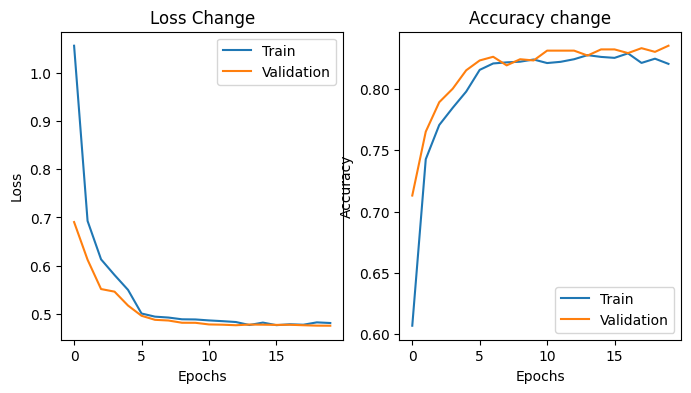

In [493]:
plot_curves(history_47)

#### Model 48: SGD - Hidden Sigmoid  (128) + Drop (0.5) + ReLU (64) + Output Softmax (10) - LRS - 20 epochs,  batch = 2

In [535]:
name_model_48 ='48: SGD - Hidden Sigm (128) + Drop (0.5) + ReLU (64) + Output Softmax (10) - LRS -  20 epochs,  batch = 2'

In [536]:
epochs = 20
batch_size = 2


optimizer = tf.keras.optimizers.SGD()

In [537]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.001    
    elif epoch < 15:
        return 0.0005
    else:
        return 0.0001

In [538]:
model_48 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dropout(0.5, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [539]:
model_48.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [540]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [541]:
start_model_48 = time.time()

In [542]:
history_48 = model_48.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/20


4500/4500 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.3870 - loss: 1.6346 - val_accuracy: 0.7210 - val_loss: 0.7576 - learning_rate: 0.0100
Epoch 2/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.6807 - loss: 0.8337 - val_accuracy: 0.7550 - val_loss: 0.6341 - learning_rate: 0.0100
Epoch 3/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7221 - loss: 0.7285 - val_accuracy: 0.7800 - val_loss: 0.5946 - learning_rate: 0.0100
Epoch 4/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.7412 - loss: 0.6868 - val_accuracy: 0.7820 - val_loss: 0.5972 - learning_rate: 0.0100
Epoch 5/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7545 - loss: 0.6596 - val_accuracy: 0.7800 - val_loss: 0.5563 - learning_rate: 0.0100
Epoch 6/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.7725 - loss: 0.6127 - val_accuracy: 0.7980 - val_loss: 0.5393 - learning_rate: 0.0010
Epoch 7/20
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.7813 - loss

In [543]:
end_model_48  = time.time() - start_model_48

In [544]:
test_loss_model_48 , test_acc_model_48  = model_48.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_48 )
print('Test loss:', test_loss_model_48 )
print ('Learning time, sec:', f'{end_model_48:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8225 - loss: 0.4919
Test accuracy: 0.8187999725341797
Test loss: 0.4969390630722046
Learning time, sec: 973.27


In [545]:
model_48.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

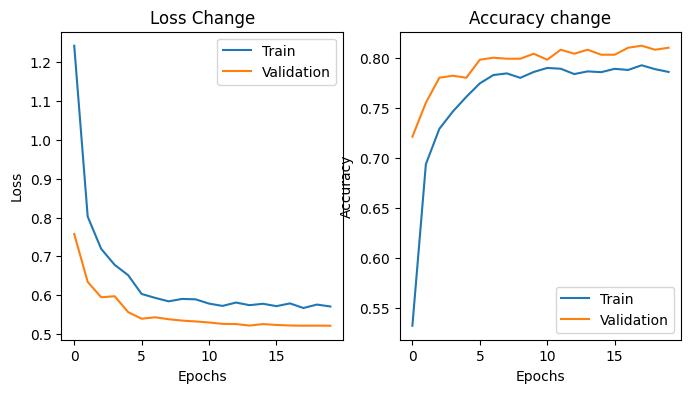

In [546]:
plot_curves(history_48)

### Additional updates for the chosen model

#### Model 49: Adam - Hidden Sigmoid  (256) + Sigmoid (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [603]:
name_model_49 ='49: Adam - Hidden Sigm (256) + Sigmoid (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [562]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [563]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [564]:
model_49 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='sigmoid', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [565]:
model_49.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [566]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [567]:
start_model_49 = time.time()

In [568]:
history_49 = model_49.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 104s 21ms/step - accuracy: 0.5880 - loss: 1.0882 - val_accuracy: 0.7940 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.7988 - loss: 0.5570 - val_accuracy: 0.8210 - val_loss: 0.5170 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 78s 17ms/step - accuracy: 0.8244 - loss: 0.4902 - val_accuracy: 0.8220 - val_loss: 0.4850 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 85s 18ms/step - accuracy: 0.8316 - loss: 0.4451 - val_accuracy: 0.8380 - val_loss: 0.4718 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.8512 - loss: 0.4180 - val_accuracy: 0.8340 - val_loss: 0.4720 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 89s 20ms/step - accuracy: 0.8755 - loss: 0.3432 - val_accuracy: 0.8480 - val_loss: 0.4683 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 161s 24ms/step - 

In [569]:
end_model_49  = time.time() - start_model_49

In [570]:
test_loss_model_49 , test_acc_model_49  = model_49.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_49 )
print('Test loss:', test_loss_model_49 )
print ('Learning time, sec:', f'{end_model_49:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9270 - loss: 0.1907
Test accuracy: 0.9228000044822693
Test loss: 0.2197071760892868
Learning time, sec: 1781.30


In [571]:
model_49.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

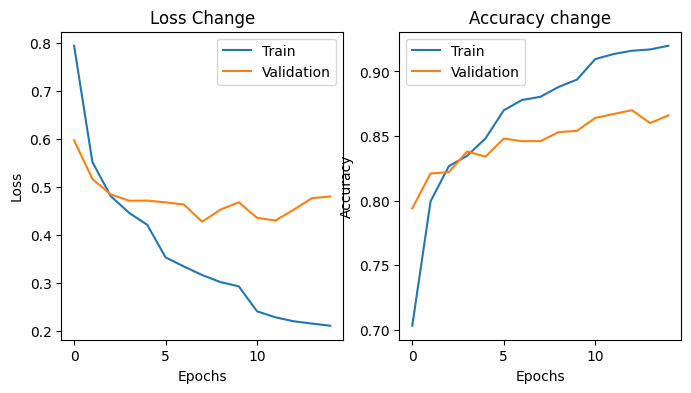

In [572]:
plot_curves(history_49)

#### Model 50: Adam - Hidden Sigmoid  (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [12]:
name_model_50 ='50: Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [13]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [14]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [15]:
model_50 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='tanh', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

/home/stacy/Documents/GitHub/DATA_homeworks/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model_50.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [18]:
start_model_50 = time.time()

In [19]:
history_50 = model_50.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6314 - loss: 0.9693 - val_accuracy: 0.7610 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8014 - loss: 0.5391 - val_accuracy: 0.8230 - val_loss: 0.4984 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.8276 - loss: 0.4783 - val_accuracy: 0.8160 - val_loss: 0.4928 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.8423 - loss: 0.4297 - val_accuracy: 0.8300 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8497 - loss: 0.4272 - val_accuracy: 0.8320 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.8747 - loss: 0.3444 - val_accuracy: 0.8520 - val_loss: 0.4256 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - ac

In [20]:
end_model_50  = time.time() - start_model_50

In [21]:
test_loss_model_50 , test_acc_model_50  = model_50.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_50 )
print('Test loss:', test_loss_model_50 )
print ('Learning time, sec:', f'{end_model_50:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9361 - loss: 0.1666
Test accuracy: 0.9304999709129333
Test loss: 0.20173107087612152
Learning time, sec: 868.49


In [22]:
model_50.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

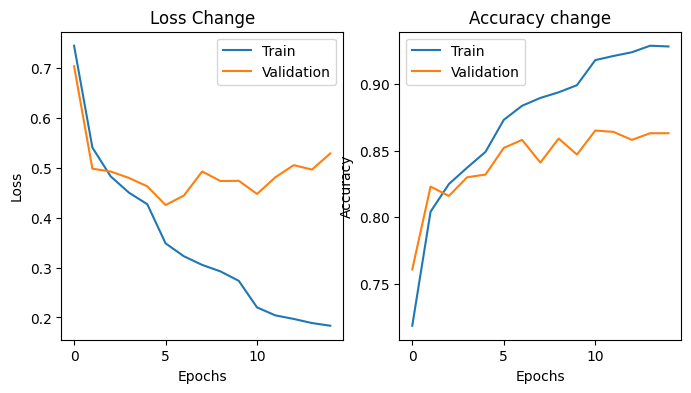

In [23]:
plot_curves(history_50)

#### Model 51: Adam - Hidden Sigmoid  (256) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [601]:
name_model_51 ='51: Adam - Hidden Sigm (256) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [587]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [588]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [589]:
model_51 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [590]:
model_51.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [591]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [592]:
start_model_51 = time.time()

In [593]:
history_51 = model_51.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 103s 21ms/step - accuracy: 0.6416 - loss: 0.9909 - val_accuracy: 0.8000 - val_loss: 0.5576 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 99s 22ms/step - accuracy: 0.7983 - loss: 0.5567 - val_accuracy: 0.7970 - val_loss: 0.5526 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 155s 25ms/step - accuracy: 0.8191 - loss: 0.4857 - val_accuracy: 0.8040 - val_loss: 0.5369 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 93s 21ms/step - accuracy: 0.8337 - loss: 0.4487 - val_accuracy: 0.8230 - val_loss: 0.5140 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 126s 17ms/step - accuracy: 0.8478 - loss: 0.4178 - val_accuracy: 0.8280 - val_loss: 0.5001 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 96s 20ms/step - accuracy: 0.8660 - loss: 0.3480 - val_accuracy: 0.8510 - val_loss: 0.4330 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 164s 25ms/step 

In [594]:
end_model_51  = time.time() - start_model_51

In [599]:
test_loss_model_51 , test_acc_model_51  = model_51.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_51 )
print('Test loss:', test_loss_model_51 )
print ('Learning time, sec:', f'{end_model_51:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9341 - loss: 0.1693
Test accuracy: 0.9284999966621399
Test loss: 0.20123058557510376
Learning time, sec: 1649.88


In [596]:
model_51.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

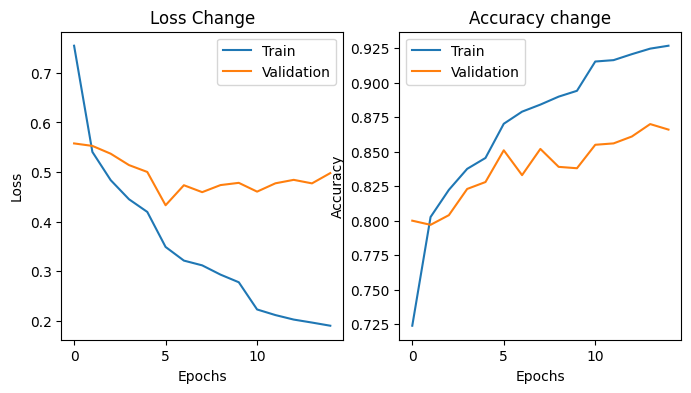

In [597]:
plot_curves(history_51)

#### Model 52: Adam - Hidden Sigmoid  (256, L2) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [612]:
name_model_52 ='52: Adam - Hidden Sigm (256, L2) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [613]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [614]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [615]:
model_52 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [616]:
model_52.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [617]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [618]:
start_model_52 = time.time()

In [619]:
history_52 = model_52.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 104s 20ms/step - accuracy: 0.6149 - loss: 1.2479 - val_accuracy: 0.7540 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 130s 18ms/step - accuracy: 0.7575 - loss: 0.8114 - val_accuracy: 0.7490 - val_loss: 0.8001 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 91s 20ms/step - accuracy: 0.7698 - loss: 0.7559 - val_accuracy: 0.8020 - val_loss: 0.7127 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 94s 20ms/step - accuracy: 0.7832 - loss: 0.7257 - val_accuracy: 0.7680 - val_loss: 0.7677 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 134s 18ms/step - accuracy: 0.7927 - loss: 0.6913 - val_accuracy: 0.7930 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.8293 - loss: 0.5989 - val_accuracy: 0.8280 - val_loss: 0.6199 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 145s 19ms/step 

In [620]:
end_model_52  = time.time() - start_model_52

In [621]:
test_loss_model_52 , test_acc_model_52  = model_52.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_52 )
print('Test loss:', test_loss_model_52 )
print ('Learning time, sec:', f'{end_model_52:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8885 - loss: 0.3733
Test accuracy: 0.8812999725341797
Test loss: 0.3928582966327667
Learning time, sec: 1771.91


In [622]:
model_52.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

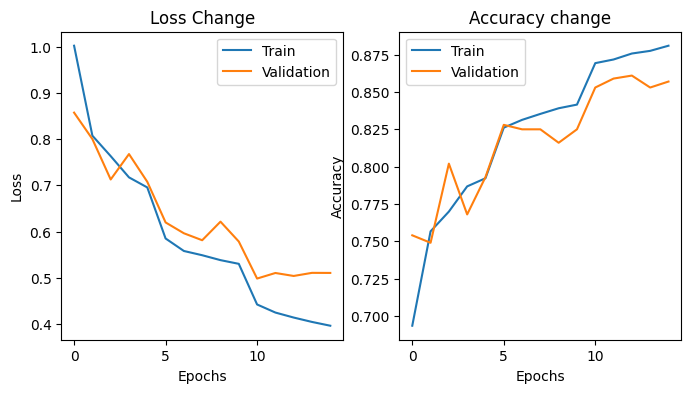

In [623]:
plot_curves(history_52)

#### Model 53: Adam - Hidden Sigmoid  (256) + Leaky ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [655]:
name_model_53 ='53: Adam - Hidden Sigm (256) + Leaky ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [656]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [657]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [658]:
model_53 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.0005), activation='leaky_relu', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [659]:
model_53.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [660]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [661]:
start_model_53 = time.time()

In [662]:
history_53 = model_53.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15


4500/4500 ━━━━━━━━━━━━━━━━━━━━ 61s 12ms/step - accuracy: 0.6363 - loss: 1.0528 - val_accuracy: 0.7650 - val_loss: 0.6707 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 52s 11ms/step - accuracy: 0.7956 - loss: 0.5975 - val_accuracy: 0.8060 - val_loss: 0.5603 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.8238 - loss: 0.5286 - val_accuracy: 0.8200 - val_loss: 0.5199 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.8302 - loss: 0.4898 - val_accuracy: 0.8340 - val_loss: 0.5016 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 56s 12ms/step - accuracy: 0.8457 - loss: 0.4504 - val_accuracy: 0.8220 - val_loss: 0.5332 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 67s 15ms/step - accuracy: 0.8728 - loss: 0.3849 - val_accuracy: 0.8460 - val_loss: 0.4648 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.8

In [663]:
end_model_53  = time.time() - start_model_53

In [664]:
test_loss_model_53 , test_acc_model_53  = model_53.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_model_53 )
print('Test loss:', test_loss_model_53 )
print ('Learning time, sec:', f'{end_model_53:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9274 - loss: 0.2072
Test accuracy: 0.923799991607666
Test loss: 0.23248080909252167
Learning time, sec: 1049.81


In [665]:
model_53.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

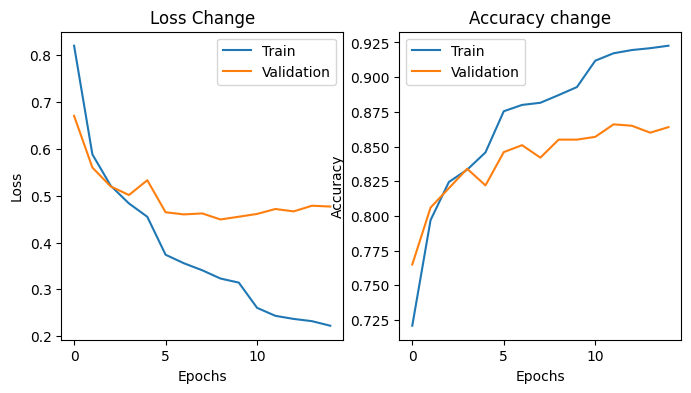

In [666]:
plot_curves(history_53)

# Comparison

In [701]:
print(f"|{'name':<130}|{'test_acc':<10}|{'test loss':<10}|{'learning time':<15}|")
for i in range(1, 54):
    model_name = 'name_model_' + str(i)
    model_test_acc = 'test_acc_model_' + str(i)
    model_test_loss = 'test_loss_model_' + str(i)
    model_learning_time = 'end_model_' + str(i)
    print()
    print(f"|{globals()[model_name]:<130}|{f'{globals()[model_test_acc]:.5f}':<10}|{f'{globals()[model_test_loss]:.5f}':<10}|{f'{globals()[model_learning_time]:.2f}':<15}|")

|name                                                                                                                              |test_acc  |test loss |learning time  |

|1: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, no batch                                                            |0.82780   |0.46709   |266.92         |

|2: SGD - Hidden ReLU (128) + Output Softmax (10) - 30 epochs, no batch                                                            |0.86980   |0.36591   |601.21         |

|3: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs, batch = 8                                                           |0.85490   |0.41649   |1025.61        |

|4: SGD - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4                                                          |0.87710   |0.34807   |276.73         |

|5: Adam - Hidden ReLU (128) + Output Softmax (10) - 10 epochs,  batch = 4                                                         |0.89130 

Бажаної точності в 91% або вище вдалося досягти на декількох моделях:

1) №25 - 0.91260 на тестовому наборі (Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2  )
2) №49 - 0.92280 на тестовому наборі (Adam - Hidden Sigm (256) + Sigmoid (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2)
3) №50 - 0.92640 на тестовому наборі (Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2) 
4) №51 - 0.92850 на тестовому наборі (Adam - Hidden Sigm (256) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2 )
2) №53 - 0.9251% на тестовому наборі (Adam - Hidden Sigm (256) + Leaky ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2)

Усі моделі побудовані на оптимізаторі Adam з першим прихованим шаром з активаційною функцією сігмоїди, навчаються по 15 епох з батч-сайзом 2 і побудовані з вживанням LearningRateScheduler, але мають різну арітектуру шарів.

Інші архітектури моделі давали теж високий, але недостатньо гарний результат. 
Вживання регуляризаторів в цілому показало погіршення точності моделі, але в версії 53 вдалося підібрати параметри для регуляризації одного з прихованих шарів так, щоб полегшити модель і трохи пришвидшити її навчання.

З урахуванням часу, потрібного на фіт моделі, найкращіми можна вважати моделі 25 та 53